# **Data cleaning, preprocessing and feature engineering**

## Importing of data, selecting relevant features and exploring of data

In [ ]:
import numpy as np
import pandas as pd

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/BT4222 group project/imdb_raw_2.csv'
data = pd.read_csv(path, encoding="ISO-8859-1")
data.head()

,lister-item-image href,loadlate src,lister-item-index,lister-item-header,lister-item-header href,lister-item-year,certificate,ghost,runtime,ghost 2,...,lister-item-content href 3,lister-item-content 5,lister-item-content href 4,lister-item-content 6,lister-item-content href 5,text-muted 2,sort-num_votes-visible,text-muted 3,text-muted href,text-muted 5
0,https://www.imdb.com/title/tt1877830/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BMDdmMT...,1.,The Batman,https://www.imdb.com/title/tt1877830/?ref_=adv...,(2022),15,|,176 min,|,...,https://www.imdb.com/name/nm2368789/?ref_=adv_...,Jeffrey Wright,https://www.imdb.com/name/nm0942482/?ref_=adv_...,Colin Farrell,https://www.imdb.com/name/nm0268199/?ref_=adv_...,Votes:,"278,245",NaN,NaN,NaN
1,https://www.imdb.com/title/tt2463208/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BOWM0YW...,2.,The Adam Project,https://www.imdb.com/title/tt2463208/?ref_=adv...,(2022),12,|,106 min,|,...,https://www.imdb.com/name/nm11880640/?ref_=adv...,Mark Ruffalo,https://www.imdb.com/name/nm0749263/?ref_=adv_...,Jennifer Garner,https://www.imdb.com/name/nm0004950/?ref_=adv_...,Votes:,"95,250",NaN,NaN,NaN
2,https://www.imdb.com/title/tt8097030/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BNjY0MG...,3.,Turning Red,https://www.imdb.com/title/tt8097030/?ref_=adv...,(2022),PG,|,100 min,|,...,https://www.imdb.com/name/nm0644897/?ref_=adv_...,Ava Morse,https://www.imdb.com/name/nm6205098/?ref_=adv_...,Hyein Park,https://www.imdb.com/name/nm7490724/?ref_=adv_...,Votes:,"51,902",NaN,NaN,NaN
3,https://www.imdb.com/title/tt10811166/?ref_=ad...,https://m.media-amazon.com/images/M/MV5BZjI0Ym...,4.,The Kashmir Files,https://www.imdb.com/title/tt10811166/?ref_=ad...,(2022),15,|,170 min,|,...,https://www.imdb.com/name/nm0451600/?ref_=adv_...,Darshan Kumaar,https://www.imdb.com/name/nm1069587/?ref_=adv_...,Pallavi Joshi,https://www.imdb.com/name/nm0430809/?ref_=adv_...,Votes:,"532,033",NaN,NaN,NaN
4,https://www.imdb.com/title/tt4179452/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BMjE1Mz...,5.,The Last Kingdom,https://www.imdb.com/title/tt4179452/?ref_=adv...,(2015â2022),18,|,60 min,|,...,https://www.imdb.com/name/nm4538500/?ref_=adv_...,Mark Rowley,https://www.imdb.com/name/nm4495529/?ref_=adv_...,NaN,NaN,Votes:,"116,832",NaN,NaN,NaN


In [ ]:
data.shape

(100199, 45)

In [ ]:
# Removing unnecessary columns
data1 = data[['lister-item-header','lister-item-year','runtime','genre','text-muted','lister-item-content 3','lister-item-content 4','lister-item-content 5', 'lister-item-content 6' ,'inline-block']]
data1.head()


,lister-item-header,lister-item-year,runtime,genre,text-muted,lister-item-content 3,lister-item-content 4,lister-item-content 5,lister-item-content 6,inline-block
0,The Batman,(2022),176 min,"Action, Crime, Drama","When the Riddler, a sadistic serial killer, be...",Robert Pattinson,ZoÃ« Kravitz,Jeffrey Wright,Colin Farrell,8.4
1,The Adam Project,(2022),106 min,"Action, Adventure, Comedy","After accidentally crash-landing in 2022, time...",Ryan Reynolds,Walker Scobell,Mark Ruffalo,Jennifer Garner,6.8
2,Turning Red,(2022),100 min,"Animation, Adventure, Comedy",A 13-year-old girl named Meilin turns into a g...,Rosalie Chiang,Sandra Oh,Ava Morse,Hyein Park,7.1
3,The Kashmir Files,(2022),170 min,"Drama, History, Thriller","The Kashmir Files' is a story, based on video ...",Mithun Chakraborty,Anupam Kher,Darshan Kumaar,Pallavi Joshi,8.3
4,The Last Kingdom,(2015â2022),60 min,"Action, Drama, History",As Alfred the Great defends his kingdom from N...,Eliza Butterworth,Arnas Fedaravicius,Mark Rowley,NaN,8.5


In [ ]:
# renaming columns
data1 = data1.rename(columns={'lister-item-header': 'title', 'text-muted': 'description','lister-item-content 3': 'cast-1',
                              'lister-item-content 4': 'cast-2','lister-item-content 5': 'cast-3', 'lister-item-content 6':'cast-4',  'lister-item-year': 'release_year', 'inline-block': 'rating'})

In [ ]:
data1.shape

(100199, 10)

In [ ]:
data1

,title,release_year,runtime,genre,description,cast-1,cast-2,cast-3,cast-4,rating
0,The Batman,(2022),176 min,"Action, Crime, Drama","When the Riddler, a sadistic serial killer, be...",Robert Pattinson,ZoÃ« Kravitz,Jeffrey Wright,Colin Farrell,8.4
1,The Adam Project,(2022),106 min,"Action, Adventure, Comedy","After accidentally crash-landing in 2022, time...",Ryan Reynolds,Walker Scobell,Mark Ruffalo,Jennifer Garner,6.8
2,Turning Red,(2022),100 min,"Animation, Adventure, Comedy",A 13-year-old girl named Meilin turns into a g...,Rosalie Chiang,Sandra Oh,Ava Morse,Hyein Park,7.1
3,The Kashmir Files,(2022),170 min,"Drama, History, Thriller","The Kashmir Files' is a story, based on video ...",Mithun Chakraborty,Anupam Kher,Darshan Kumaar,Pallavi Joshi,8.3
4,The Last Kingdom,(2015â2022),60 min,"Action, Drama, History",As Alfred the Great defends his kingdom from N...,Eliza Butterworth,Arnas Fedaravicius,Mark Rowley,NaN,8.5
...,...,...,...,...,...,...,...,...,...,...
100194,Sasha,(2010),102 min,"Comedy, Crime, Drama",Sasha is a piano prodigy under pressure to gai...,Sasa Kekez,Predrag Bjelac,Ljubisa Gruicic,Zeljka Preksavec,6.7
100195,It Rained All Night the Day I Left,(1980),95 min,"Comedy, Crime",A tough rich female ranch owner in Africa want...,Tony Curtis,Louis Gossett Jr.,Sally Kellerman,John Vernon,4.2
100196,Buddha Collapsed Out of Shame,(2007),81 min,"Drama, War","In Afghanistan, a young girl wants to go to sc...",Abbas Alijome,Abdolali Hoseinali,Nikbakht Noruz,NaN,7.2
100197,Alia's Birth,(2021),66 min,Drama,A rocky relationship between a female couple f...,Poorna Jagannathan,Nikohl Boosheri,Samuel H. Levine,Maya Kazan,NaN


In [ ]:
data1.isnull().sum()

title               0
release_year     3627
runtime         15456
genre             698
description      3527
cast-1           2505
cast-2           3635
cast-3           4714
cast-4          28814
rating           8483
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100199 entries, 0 to 100198
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         100199 non-null  object 
 1   release_year  96572 non-null   object 
 2   runtime       84743 non-null   object 
 3   genre         99501 non-null   object 
 4   description   96672 non-null   object 
 5   cast-1        97694 non-null   object 
 6   cast-2        96564 non-null   object 
 7   cast-3        95485 non-null   object 
 8   cast-4        71385 non-null   object 
 9   rating        91716 non-null   float64
dtypes: float64(1), object(9)
memory usage: 7.6+ MB


In [ ]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in data1.columns:
    print('{} : {}'.format(col,data1[col].unique()))

title : ['The Batman' 'The Adam Project' 'Turning Red' ...
 'Buddha Collapsed Out of Shame' "Alia's Birth"
 'FPS: First Person Shooter']
release_year : ['(2022)' '(2015â\x80\x932022)' '(2021)' ... '(1987â\x80\x932016)'
 '(1972â\x80\x931987)' '(1986â\x80\x932001)']
runtime : ['176 min' '106 min' '100 min' '170 min' '60 min' '148 min' '105 min'
 '115 min' '55 min' '30 min' '52 min' '44 min' '57 min' '156 min' '24 min'
 '126 min' '59 min' '114 min' '51 min' '155 min' '81 min' '150 min'
 '101 min' '46 min' '133 min' '116 min' '102 min' '131 min' '49 min' nan
 '41 min' '152 min' '112 min' '98 min' '132 min' '22 min' '108 min'
 '140 min' '43 min' '175 min' '142 min' '14 min' '153 min' '128 min'
 '40 min' '164 min' '45 min' '58 min' '111 min' '124 min' '138 min'
 '134 min' '104 min' '23 min' '120 min' '163 min' '143 min' '90 min'
 '144 min' '62 min' '54 min' '95 min' '122 min' '130 min' '83 min'
 '181 min' '117 min' '42 min' '113 min' '121 min' '110 min' '147 min'
 '53 min' '92 min' '180 min'

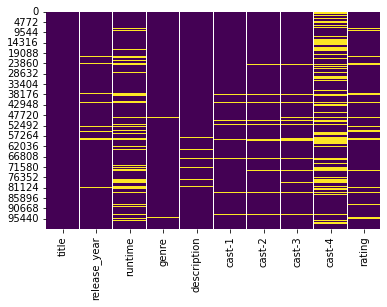

In [ ]:
import seaborn as sns
sns.heatmap(data1.isnull(),cbar=False,cmap='viridis')

In [ ]:
duplicated = data1['title'].duplicated().any()
duplicated

True

## Addition of feature **type**

In [ ]:
# first check of movies: if there are no duplicates in data
movie_data = data1[data1.duplicated('title',keep=False)==False]
movie_data['type'] = 'Movie'
movie_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,release_year,runtime,genre,description,cast-1,cast-2,cast-3,cast-4,rating,type
1,The Adam Project,(2022),106 min,"Action, Adventure, Comedy","After accidentally crash-landing in 2022, time...",Ryan Reynolds,Walker Scobell,Mark Ruffalo,Jennifer Garner,6.8,Movie
2,Turning Red,(2022),100 min,"Animation, Adventure, Comedy",A 13-year-old girl named Meilin turns into a g...,Rosalie Chiang,Sandra Oh,Ava Morse,Hyein Park,7.1,Movie
3,The Kashmir Files,(2022),170 min,"Drama, History, Thriller","The Kashmir Files' is a story, based on video ...",Mithun Chakraborty,Anupam Kher,Darshan Kumaar,Pallavi Joshi,8.3,Movie
4,The Last Kingdom,(2015â2022),60 min,"Action, Drama, History",As Alfred the Great defends his kingdom from N...,Eliza Butterworth,Arnas Fedaravicius,Mark Rowley,NaN,8.5,Movie
5,Spider-Man: No Way Home,(2021),148 min,"Action, Adventure, Fantasy","With Spider-Man's identity now revealed, Peter...",Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon,8.5,Movie
...,...,...,...,...,...,...,...,...,...,...,...
100194,Sasha,(2010),102 min,"Comedy, Crime, Drama",Sasha is a piano prodigy under pressure to gai...,Sasa Kekez,Predrag Bjelac,Ljubisa Gruicic,Zeljka Preksavec,6.7,Movie
100195,It Rained All Night the Day I Left,(1980),95 min,"Comedy, Crime",A tough rich female ranch owner in Africa want...,Tony Curtis,Louis Gossett Jr.,Sally Kellerman,John Vernon,4.2,Movie
100196,Buddha Collapsed Out of Shame,(2007),81 min,"Drama, War","In Afghanistan, a young girl wants to go to sc...",Abbas Alijome,Abdolali Hoseinali,Nikbakht Noruz,NaN,7.2,Movie
100197,Alia's Birth,(2021),66 min,Drama,A rocky relationship between a female couple f...,Poorna Jagannathan,Nikohl Boosheri,Samuel H. Levine,Maya Kazan,NaN,Movie


In [ ]:
# second check of movies: if 'release_year' contains a dash
def movieOrTV(x):
  if "â" in x:
    return "TV Show"
  else:
    return "Movie"

movie_data['type'] = movie_data.release_year.apply(lambda x: movieOrTV(str(x)))
movie_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,release_year,runtime,genre,description,cast-1,cast-2,cast-3,cast-4,rating,type
1,The Adam Project,(2022),106 min,"Action, Adventure, Comedy","After accidentally crash-landing in 2022, time...",Ryan Reynolds,Walker Scobell,Mark Ruffalo,Jennifer Garner,6.8,Movie
2,Turning Red,(2022),100 min,"Animation, Adventure, Comedy",A 13-year-old girl named Meilin turns into a g...,Rosalie Chiang,Sandra Oh,Ava Morse,Hyein Park,7.1,Movie
3,The Kashmir Files,(2022),170 min,"Drama, History, Thriller","The Kashmir Files' is a story, based on video ...",Mithun Chakraborty,Anupam Kher,Darshan Kumaar,Pallavi Joshi,8.3,Movie
4,The Last Kingdom,(2015â2022),60 min,"Action, Drama, History",As Alfred the Great defends his kingdom from N...,Eliza Butterworth,Arnas Fedaravicius,Mark Rowley,NaN,8.5,TV Show
5,Spider-Man: No Way Home,(2021),148 min,"Action, Adventure, Fantasy","With Spider-Man's identity now revealed, Peter...",Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon,8.5,Movie
...,...,...,...,...,...,...,...,...,...,...,...
100194,Sasha,(2010),102 min,"Comedy, Crime, Drama",Sasha is a piano prodigy under pressure to gai...,Sasa Kekez,Predrag Bjelac,Ljubisa Gruicic,Zeljka Preksavec,6.7,Movie
100195,It Rained All Night the Day I Left,(1980),95 min,"Comedy, Crime",A tough rich female ranch owner in Africa want...,Tony Curtis,Louis Gossett Jr.,Sally Kellerman,John Vernon,4.2,Movie
100196,Buddha Collapsed Out of Shame,(2007),81 min,"Drama, War","In Afghanistan, a young girl wants to go to sc...",Abbas Alijome,Abdolali Hoseinali,Nikbakht Noruz,NaN,7.2,Movie
100197,Alia's Birth,(2021),66 min,Drama,A rocky relationship between a female couple f...,Poorna Jagannathan,Nikohl Boosheri,Samuel H. Levine,Maya Kazan,NaN,Movie


In [ ]:
tv_shows = data1[data1.duplicated('title',keep=False)==True]
tv_shows['type'] = 'TV Show'
tv_shows

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,release_year,runtime,genre,description,cast-1,cast-2,cast-3,cast-4,rating,type
0,The Batman,(2022),176 min,"Action, Crime, Drama","When the Riddler, a sadistic serial killer, be...",Robert Pattinson,ZoÃ« Kravitz,Jeffrey Wright,Colin Farrell,8.4,TV Show
6,X,(II) (2022),105 min,Horror,"In 1979, a group of young filmmakers set out t...",Mia Goth,Jenna Ortega,Brittany Snow,Kid Cudi,7.4,TV Show
7,Deep Water,(2022),115 min,"Drama, Mystery, Thriller",A well-to-do husband who allows his wife to ha...,Ben Affleck,Ana de Armas,Tracy Letts,Grace Jenkins,5.4,TV Show
8,Euphoria,(2019â ),55 min,Drama,A look at life for a group of high school stud...,Hunter Schafer,Angus Cloud,Jacob Elordi,NaN,8.4,TV Show
9,Peaky Blinders,(2013â2022),60 min,"Crime, Drama","A gangster family epic set in 1900s England, c...",Paul Anderson,Sophie Rundle,Helen McCrory,NaN,8.8,TV Show
...,...,...,...,...,...,...,...,...,...,...,...
100133,Oh My Ghost,(2021),114 min,Drama,Oh My Ghost is a comedy genre Marathi film in ...,Kurush Deboo,Apoorva Deshpande,Prem Gadhavi,Prathamesh Parab,7.2,TV Show
100171,The Enchanted Forest,(1945),78 min,"Drama, Family",A little boy lost in the woods is found and ra...,Edmund Lowe,Brenda Joyce,William Severn,Harry Davenport,5.9,TV Show
100176,Dollar,(1938),78 min,Comedy,"Ludvig and Sussi Battwyhl, Louis and Katja Bre...",Ingrid Bergman,Georg Rydeberg,Tutta Rolf,Kotti Chave,5.7,TV Show
100178,Behind Closed Doors,(II) (2013),105 min,Drama,"In this suspense drama, living on the edge see...",Leonardo Black,June Buckner,Poetess Hunni Bunn,Ursula Cook,6.1,TV Show


In [ ]:
data1[data1['title'] =='Euphoria']

,title,release_year,runtime,genre,description,cast-1,cast-2,cast-3,cast-4,rating
8,Euphoria,(2019â ),55 min,Drama,A look at life for a group of high school stud...,Hunter Schafer,Angus Cloud,Jacob Elordi,NaN,8.4
3464,Euphoria,(2012â2013),52 min,Drama,"Euphoria portrays a sexy, troubling, and bold ...",Dekel Adin,Amit Erez,Avi Mazliah,NaN,6.0
8146,Euphoria,(I) (2017),104 min,"Adventure, Drama, Mystery",Sisters in conflict travelling through Europe ...,Alicia Vikander,Eva Green,Charles Dance,Charlotte Rampling,5.7
27981,Euphoria,(2018),115 min,Drama,A difficult situation gives two distant brothe...,Riccardo Scamarcio,Valerio Mastandrea,Isabella Ferrari,Valentina Cervi,6.5
60153,Euphoria,(2013),100 min,Drama,Euphoria brings together two intersecting road...,Brooke Palsson,Sarah Constible,Taya Ayotte Bourns,Adriana O'Neil,6.2
90392,Euphoria,(2006),74 min,"Drama, Romance",A romantic triangle leads to both joy and sorr...,Polina Agureeva,Maksim Ushakov,Mikhail Okunev,Yaroslavna Serova,6.5


In [ ]:
data1 = pd.concat([movie_data,tv_shows], axis=0)
data1

,title,release_year,runtime,genre,description,cast-1,cast-2,cast-3,cast-4,rating,type
1,The Adam Project,(2022),106 min,"Action, Adventure, Comedy","After accidentally crash-landing in 2022, time...",Ryan Reynolds,Walker Scobell,Mark Ruffalo,Jennifer Garner,6.8,Movie
2,Turning Red,(2022),100 min,"Animation, Adventure, Comedy",A 13-year-old girl named Meilin turns into a g...,Rosalie Chiang,Sandra Oh,Ava Morse,Hyein Park,7.1,Movie
3,The Kashmir Files,(2022),170 min,"Drama, History, Thriller","The Kashmir Files' is a story, based on video ...",Mithun Chakraborty,Anupam Kher,Darshan Kumaar,Pallavi Joshi,8.3,Movie
4,The Last Kingdom,(2015â2022),60 min,"Action, Drama, History",As Alfred the Great defends his kingdom from N...,Eliza Butterworth,Arnas Fedaravicius,Mark Rowley,NaN,8.5,TV Show
5,Spider-Man: No Way Home,(2021),148 min,"Action, Adventure, Fantasy","With Spider-Man's identity now revealed, Peter...",Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon,8.5,Movie
...,...,...,...,...,...,...,...,...,...,...,...
100133,Oh My Ghost,(2021),114 min,Drama,Oh My Ghost is a comedy genre Marathi film in ...,Kurush Deboo,Apoorva Deshpande,Prem Gadhavi,Prathamesh Parab,7.2,TV Show
100171,The Enchanted Forest,(1945),78 min,"Drama, Family",A little boy lost in the woods is found and ra...,Edmund Lowe,Brenda Joyce,William Severn,Harry Davenport,5.9,TV Show
100176,Dollar,(1938),78 min,Comedy,"Ludvig and Sussi Battwyhl, Louis and Katja Bre...",Ingrid Bergman,Georg Rydeberg,Tutta Rolf,Kotti Chave,5.7,TV Show
100178,Behind Closed Doors,(II) (2013),105 min,Drama,"In this suspense drama, living on the edge see...",Leonardo Black,June Buckner,Poetess Hunni Bunn,Ursula Cook,6.1,TV Show


In [ ]:
data1.shape

(100199, 11)

In [ ]:
data1

,title,release_year,runtime,genre,description,cast-1,cast-2,cast-3,cast-4,rating,type
1,The Adam Project,(2022),106 min,"Action, Adventure, Comedy","After accidentally crash-landing in 2022, time...",Ryan Reynolds,Walker Scobell,Mark Ruffalo,Jennifer Garner,6.8,Movie
2,Turning Red,(2022),100 min,"Animation, Adventure, Comedy",A 13-year-old girl named Meilin turns into a g...,Rosalie Chiang,Sandra Oh,Ava Morse,Hyein Park,7.1,Movie
3,The Kashmir Files,(2022),170 min,"Drama, History, Thriller","The Kashmir Files' is a story, based on video ...",Mithun Chakraborty,Anupam Kher,Darshan Kumaar,Pallavi Joshi,8.3,Movie
4,The Last Kingdom,(2015â2022),60 min,"Action, Drama, History",As Alfred the Great defends his kingdom from N...,Eliza Butterworth,Arnas Fedaravicius,Mark Rowley,NaN,8.5,TV Show
5,Spider-Man: No Way Home,(2021),148 min,"Action, Adventure, Fantasy","With Spider-Man's identity now revealed, Peter...",Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon,8.5,Movie
...,...,...,...,...,...,...,...,...,...,...,...
100133,Oh My Ghost,(2021),114 min,Drama,Oh My Ghost is a comedy genre Marathi film in ...,Kurush Deboo,Apoorva Deshpande,Prem Gadhavi,Prathamesh Parab,7.2,TV Show
100171,The Enchanted Forest,(1945),78 min,"Drama, Family",A little boy lost in the woods is found and ra...,Edmund Lowe,Brenda Joyce,William Severn,Harry Davenport,5.9,TV Show
100176,Dollar,(1938),78 min,Comedy,"Ludvig and Sussi Battwyhl, Louis and Katja Bre...",Ingrid Bergman,Georg Rydeberg,Tutta Rolf,Kotti Chave,5.7,TV Show
100178,Behind Closed Doors,(II) (2013),105 min,Drama,"In this suspense drama, living on the edge see...",Leonardo Black,June Buckner,Poetess Hunni Bunn,Ursula Cook,6.1,TV Show


In [ ]:
# list of columns
list(data1.columns)

['title',
 'release_year',
 'runtime',
 'genre',
 'description',
 'cast-1',
 'cast-2',
 'cast-3',
 'cast-4',
 'rating',
 'type']

## Addition of feature **end_year**

In [ ]:
# split release and end year
data1['release_year']= data1.release_year.str.replace("(", "")
data1['release_year']= data1.release_year.str.replace(")", "")
data1[['release_year','end_year']]= data1.release_year.str.split("â", expand = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data1

,title,release_year,runtime,genre,description,cast-1,cast-2,cast-3,cast-4,rating,type,end_year
1,The Adam Project,2022,106 min,"Action, Adventure, Comedy","After accidentally crash-landing in 2022, time...",Ryan Reynolds,Walker Scobell,Mark Ruffalo,Jennifer Garner,6.8,Movie,None
2,Turning Red,2022,100 min,"Animation, Adventure, Comedy",A 13-year-old girl named Meilin turns into a g...,Rosalie Chiang,Sandra Oh,Ava Morse,Hyein Park,7.1,Movie,None
3,The Kashmir Files,2022,170 min,"Drama, History, Thriller","The Kashmir Files' is a story, based on video ...",Mithun Chakraborty,Anupam Kher,Darshan Kumaar,Pallavi Joshi,8.3,Movie,None
4,The Last Kingdom,2015,60 min,"Action, Drama, History",As Alfred the Great defends his kingdom from N...,Eliza Butterworth,Arnas Fedaravicius,Mark Rowley,NaN,8.5,TV Show,2022
5,Spider-Man: No Way Home,2021,148 min,"Action, Adventure, Fantasy","With Spider-Man's identity now revealed, Peter...",Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon,8.5,Movie,None
...,...,...,...,...,...,...,...,...,...,...,...,...
100133,Oh My Ghost,2021,114 min,Drama,Oh My Ghost is a comedy genre Marathi film in ...,Kurush Deboo,Apoorva Deshpande,Prem Gadhavi,Prathamesh Parab,7.2,TV Show,None
100171,The Enchanted Forest,1945,78 min,"Drama, Family",A little boy lost in the woods is found and ra...,Edmund Lowe,Brenda Joyce,William Severn,Harry Davenport,5.9,TV Show,None
100176,Dollar,1938,78 min,Comedy,"Ludvig and Sussi Battwyhl, Louis and Katja Bre...",Ingrid Bergman,Georg Rydeberg,Tutta Rolf,Kotti Chave,5.7,TV Show,None
100178,Behind Closed Doors,II 2013,105 min,Drama,"In this suspense drama, living on the edge see...",Leonardo Black,June Buckner,Poetess Hunni Bunn,Ursula Cook,6.1,TV Show,None


In [ ]:
end_year = data1.pop('end_year')
data1.insert(2,'end_year', end_year)
data1

,title,release_year,end_year,runtime,genre,description,cast-1,cast-2,cast-3,cast-4,rating,type
1,The Adam Project,2022,None,106 min,"Action, Adventure, Comedy","After accidentally crash-landing in 2022, time...",Ryan Reynolds,Walker Scobell,Mark Ruffalo,Jennifer Garner,6.8,Movie
2,Turning Red,2022,None,100 min,"Animation, Adventure, Comedy",A 13-year-old girl named Meilin turns into a g...,Rosalie Chiang,Sandra Oh,Ava Morse,Hyein Park,7.1,Movie
3,The Kashmir Files,2022,None,170 min,"Drama, History, Thriller","The Kashmir Files' is a story, based on video ...",Mithun Chakraborty,Anupam Kher,Darshan Kumaar,Pallavi Joshi,8.3,Movie
4,The Last Kingdom,2015,2022,60 min,"Action, Drama, History",As Alfred the Great defends his kingdom from N...,Eliza Butterworth,Arnas Fedaravicius,Mark Rowley,NaN,8.5,TV Show
5,Spider-Man: No Way Home,2021,None,148 min,"Action, Adventure, Fantasy","With Spider-Man's identity now revealed, Peter...",Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon,8.5,Movie
...,...,...,...,...,...,...,...,...,...,...,...,...
100133,Oh My Ghost,2021,None,114 min,Drama,Oh My Ghost is a comedy genre Marathi film in ...,Kurush Deboo,Apoorva Deshpande,Prem Gadhavi,Prathamesh Parab,7.2,TV Show
100171,The Enchanted Forest,1945,None,78 min,"Drama, Family",A little boy lost in the woods is found and ra...,Edmund Lowe,Brenda Joyce,William Severn,Harry Davenport,5.9,TV Show
100176,Dollar,1938,None,78 min,Comedy,"Ludvig and Sussi Battwyhl, Louis and Katja Bre...",Ingrid Bergman,Georg Rydeberg,Tutta Rolf,Kotti Chave,5.7,TV Show
100178,Behind Closed Doors,II 2013,None,105 min,Drama,"In this suspense drama, living on the edge see...",Leonardo Black,June Buckner,Poetess Hunni Bunn,Ursula Cook,6.1,TV Show


In [ ]:
data1.shape

(100199, 12)

## Data cleaning on feature **runtime**

In [ ]:
data1['runtime'] = data1['runtime'].str.replace(' min','')
data1['runtime'] = data1['runtime'].str.replace(',','')
data1['runtime'] = data1['runtime'].astype(float)
data1

,title,release_year,end_year,runtime,genre,description,cast-1,cast-2,cast-3,cast-4,rating,type
1,The Adam Project,2022,None,106.0,"Action, Adventure, Comedy","After accidentally crash-landing in 2022, time...",Ryan Reynolds,Walker Scobell,Mark Ruffalo,Jennifer Garner,6.8,Movie
2,Turning Red,2022,None,100.0,"Animation, Adventure, Comedy",A 13-year-old girl named Meilin turns into a g...,Rosalie Chiang,Sandra Oh,Ava Morse,Hyein Park,7.1,Movie
3,The Kashmir Files,2022,None,170.0,"Drama, History, Thriller","The Kashmir Files' is a story, based on video ...",Mithun Chakraborty,Anupam Kher,Darshan Kumaar,Pallavi Joshi,8.3,Movie
4,The Last Kingdom,2015,2022,60.0,"Action, Drama, History",As Alfred the Great defends his kingdom from N...,Eliza Butterworth,Arnas Fedaravicius,Mark Rowley,NaN,8.5,TV Show
5,Spider-Man: No Way Home,2021,None,148.0,"Action, Adventure, Fantasy","With Spider-Man's identity now revealed, Peter...",Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon,8.5,Movie
...,...,...,...,...,...,...,...,...,...,...,...,...
100133,Oh My Ghost,2021,None,114.0,Drama,Oh My Ghost is a comedy genre Marathi film in ...,Kurush Deboo,Apoorva Deshpande,Prem Gadhavi,Prathamesh Parab,7.2,TV Show
100171,The Enchanted Forest,1945,None,78.0,"Drama, Family",A little boy lost in the woods is found and ra...,Edmund Lowe,Brenda Joyce,William Severn,Harry Davenport,5.9,TV Show
100176,Dollar,1938,None,78.0,Comedy,"Ludvig and Sussi Battwyhl, Louis and Katja Bre...",Ingrid Bergman,Georg Rydeberg,Tutta Rolf,Kotti Chave,5.7,TV Show
100178,Behind Closed Doors,II 2013,None,105.0,Drama,"In this suspense drama, living on the edge see...",Leonardo Black,June Buckner,Poetess Hunni Bunn,Ursula Cook,6.1,TV Show


## Data aggregation to remove duplicates of **titles** and remove NA values

In [ ]:
data2=data1.groupby(["title"], as_index = False).agg({
                           'genre': 'first',
                           'description': 'first',
                           'cast-1': 'first',
                           'cast-2': 'first',
                           'cast-3': 'first',
                           'cast-4': 'first',
                           'release_year': 'first',
                           'end_year':'first',
                           'type': 'first',
                           'rating': 'mean',
                           'runtime': 'mean'})
data2

,title,genre,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,rating,runtime
0,"""Giliap""","Crime, Drama",A man arrives in a Swedish port city to work a...,Thommy Berggren,Mona Seilitz,Willie AndrÃ©ason,Lars-Levi LÃ¦stadius,1975,None,Movie,6.3,137.0
1,#69 Samskar Colony,Romance,"Koushik, a teenage boy, moves to the city with...",Ajay,Fm Babai,Badram,Bapiraju,2022,None,Movie,7.7,126.0
2,#Alive,"Action, Drama, Horror",The rapid spread of an unknown infection has l...,Yoo Ah-in,Park Shin-Hye,Jeon Bae-soo,Hyun-Wook Lee,2020,None,Movie,6.3,98.0
3,#AnneFrank. Parallel Stories,"Drama, History",It is based on five women who did survive the ...,Anna Migotto,Helen Mirren,Anne Frank,Martina Gatti,2019,None,Movie,6.5,92.0
4,#BlackAF,Comedy,A father takes an irreverent and honest approa...,Kenya Barris,Iman Benson,Genneya Walton,None,2020,None,Movie,6.7,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
88510,ÃÃ§ Harfliler: Adak,"Horror, Thriller",Salih was shot with a rifle in the forest wher...,Ramazan Demir,Ceren Yilmaz,Ejder Ãzkarsligil,Simge Uluer,2019,None,Movie,5.0,91.0
88511,ÃÃ§ KagitÃ§i,Comedy,Rifki has lots of luck everything seems to go ...,Kemal Sunal,ÃlkÃ¼ Ãzen,Ali Sen,Turgut Ãzatay,1981,None,Movie,7.7,88.0
88512,ÃÃ§ Kiz Kardes,Drama,"Three Sisters, love, betrayal, mercy, friendsh...",Iclal Aydin,Berker GÃ¼ven,ÃzgÃ¼ Kaya,None,2022,,TV Show,6.5,150.0
88513,äºæå»¿ä¹,"Drama, Romance","Yeesa Cheung (Sofiee Ng), born on a leap day, ...",Tien You Chui,Chun-Him Lau,None,None,2020,None,Movie,8.4,NaN


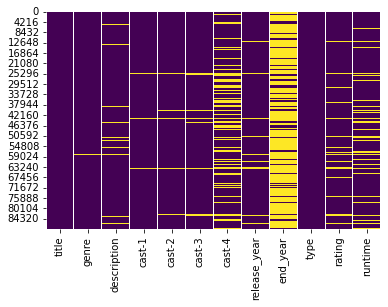

In [ ]:
import seaborn as sns
sns.heatmap(data2.isnull(),cbar=False,cmap='viridis')

In [ ]:
data2 =  data2.dropna(subset=['release_year','genre','runtime','cast-1','rating','description'])
data2.shape

(72828, 12)

## Processing of **Genre** 

In [ ]:
x = data2[data2.title == 'Patriot Act with Hasan Minhaj']
x[['genre_1','genre_2','genre_3']]= x.genre.str.split(",", expand = True)
x

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,title,genre,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,rating,runtime,genre_1,genre_2,genre_3
51880,Patriot Act with Hasan Minhaj,"Comedy, News, Talk-Show","In this weekly show, the former Daily Show cor...",Joyelle Johnson,Arnab Goswami,Andrew Yang,None,2018,2020,TV Show,8.2,25.0,Comedy,News,Talk-Show


In [ ]:
#splitting the genre
data2[['genre_1','genre_2','genre_3']]= data2.genre.str.split(",", expand = True)
data2 = data2.drop('genre', axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data2

,title,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,rating,runtime,genre_1,genre_2,genre_3
0,"""Giliap""",A man arrives in a Swedish port city to work a...,Thommy Berggren,Mona Seilitz,Willie AndrÃ©ason,Lars-Levi LÃ¦stadius,1975,None,Movie,6.3,137.0,Crime,Drama,None
1,#69 Samskar Colony,"Koushik, a teenage boy, moves to the city with...",Ajay,Fm Babai,Badram,Bapiraju,2022,None,Movie,7.7,126.0,Romance,None,None
2,#Alive,The rapid spread of an unknown infection has l...,Yoo Ah-in,Park Shin-Hye,Jeon Bae-soo,Hyun-Wook Lee,2020,None,Movie,6.3,98.0,Action,Drama,Horror
3,#AnneFrank. Parallel Stories,It is based on five women who did survive the ...,Anna Migotto,Helen Mirren,Anne Frank,Martina Gatti,2019,None,Movie,6.5,92.0,Drama,History,None
4,#BlackAF,A father takes an irreverent and honest approa...,Kenya Barris,Iman Benson,Genneya Walton,None,2020,None,Movie,6.7,36.0,Comedy,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88508,ÃÃ§ Harfliler 2: Hablis,A happily married couple will begin to experie...,ÃzgÃ¼r Bakar,Alper Kivicim,Funda Aksoy,Elvan Albat,2015,None,Movie,3.6,104.0,Horror,None,None
88509,ÃÃ§ Harfliler 3: KarabÃ¼yÃ¼,Kadir is a man victimized to his mother's blac...,Seda Oguz,Ãzay Fecht,Deniz GÃ¼ndogdu,Metin Yildirim,2016,None,Movie,5.8,87.0,Horror,None,None
88510,ÃÃ§ Harfliler: Adak,Salih was shot with a rifle in the forest wher...,Ramazan Demir,Ceren Yilmaz,Ejder Ãzkarsligil,Simge Uluer,2019,None,Movie,5.0,91.0,Horror,Thriller,None
88511,ÃÃ§ KagitÃ§i,Rifki has lots of luck everything seems to go ...,Kemal Sunal,ÃlkÃ¼ Ãzen,Ali Sen,Turgut Ãzatay,1981,None,Movie,7.7,88.0,Comedy,None,None


In [ ]:
#clean the words
lst = ['genre_1','genre_2','genre_3']
for i in lst:
  data2[i] = data2[i].str.strip()

In [ ]:
data2

,title,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,rating,runtime,genre_1,genre_2,genre_3
0,"""Giliap""",A man arrives in a Swedish port city to work a...,Thommy Berggren,Mona Seilitz,Willie AndrÃ©ason,Lars-Levi LÃ¦stadius,1975,None,Movie,6.3,137.0,Crime,Drama,None
1,#69 Samskar Colony,"Koushik, a teenage boy, moves to the city with...",Ajay,Fm Babai,Badram,Bapiraju,2022,None,Movie,7.7,126.0,Romance,None,None
2,#Alive,The rapid spread of an unknown infection has l...,Yoo Ah-in,Park Shin-Hye,Jeon Bae-soo,Hyun-Wook Lee,2020,None,Movie,6.3,98.0,Action,Drama,Horror
3,#AnneFrank. Parallel Stories,It is based on five women who did survive the ...,Anna Migotto,Helen Mirren,Anne Frank,Martina Gatti,2019,None,Movie,6.5,92.0,Drama,History,None
4,#BlackAF,A father takes an irreverent and honest approa...,Kenya Barris,Iman Benson,Genneya Walton,None,2020,None,Movie,6.7,36.0,Comedy,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88508,ÃÃ§ Harfliler 2: Hablis,A happily married couple will begin to experie...,ÃzgÃ¼r Bakar,Alper Kivicim,Funda Aksoy,Elvan Albat,2015,None,Movie,3.6,104.0,Horror,None,None
88509,ÃÃ§ Harfliler 3: KarabÃ¼yÃ¼,Kadir is a man victimized to his mother's blac...,Seda Oguz,Ãzay Fecht,Deniz GÃ¼ndogdu,Metin Yildirim,2016,None,Movie,5.8,87.0,Horror,None,None
88510,ÃÃ§ Harfliler: Adak,Salih was shot with a rifle in the forest wher...,Ramazan Demir,Ceren Yilmaz,Ejder Ãzkarsligil,Simge Uluer,2019,None,Movie,5.0,91.0,Horror,Thriller,None
88511,ÃÃ§ KagitÃ§i,Rifki has lots of luck everything seems to go ...,Kemal Sunal,ÃlkÃ¼ Ãzen,Ali Sen,Turgut Ãzatay,1981,None,Movie,7.7,88.0,Comedy,None,None


In [ ]:
a = list(data2['genre_1'].unique())
a

['Crime',
 'Romance',
 'Action',
 'Drama',
 'Comedy',
 'Horror',
 'Biography',
 'Thriller',
 'Mystery',
 'Western',
 'Animation',
 'Adventure',
 'Talk-Show',
 'Reality-TV',
 'Sci-Fi',
 'Documentary',
 'Music',
 'Game-Show',
 'History',
 'Fantasy',
 'News',
 'Short',
 'Sport',
 'Family',
 'Musical',
 'War',
 'Film-Noir',
 'Adult']

In [ ]:
b = list(data2['genre_2'].unique())
b

['Drama',
 None,
 'History',
 'Thriller',
 'Comedy',
 'Romance',
 'Mystery',
 'Crime',
 'Music',
 'Fantasy',
 'Sci-Fi',
 'Family',
 'Action',
 'Adventure',
 'Horror',
 'Sport',
 'Short',
 'Reality-TV',
 'War',
 'Biography',
 'Western',
 'Musical',
 'Talk-Show',
 'News',
 'Game-Show',
 'Film-Noir',
 'Animation',
 'Documentary',
 'Adult']

In [ ]:
c = list(data2['genre_3'].unique())
c

[None,
 'Horror',
 'Drama',
 'Romance',
 'Thriller',
 'Fantasy',
 'History',
 'War',
 'Film-Noir',
 'Music',
 'Musical',
 'Adventure',
 'Sci-Fi',
 'Sport',
 'Comedy',
 'Family',
 'Crime',
 'Mystery',
 'Western',
 'Biography',
 'Action',
 'Reality-TV',
 'Game-Show',
 'Talk-Show',
 'Animation',
 'News',
 'Short']

In [ ]:
a.extend(b)
a.extend(c)
len(a)

84

In [ ]:
len(a)

84

In [ ]:
genres = pd.DataFrame(a, columns = ['Genre'])
genres['Genre'] = genres['Genre'].str.strip()
genres = genres.drop_duplicates()
genres

,Genre
0,Crime
1,Romance
2,Action
3,Drama
4,Comedy
5,Horror
6,Biography
7,Thriller
8,Mystery
9,Western


In [ ]:
len(genres)

29

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
enc.fit(genres)

OneHotEncoder()

In [ ]:
name = enc.categories_
name

[array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
        'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
        'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
        'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
        'Talk-Show', 'Thriller', 'War', 'Western', None], dtype=object)]

In [ ]:
test = enc.transform(data2[['genre_1']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genre_1
Feature names seen at fit time, yet now missing:
- Genre

  warnings.warn(message, FutureWarning)


In [ ]:
test.toarray()[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
test2 = enc.transform(data2[['genre_2']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genre_2
Feature names seen at fit time, yet now missing:
- Genre

  warnings.warn(message, FutureWarning)


In [ ]:
test2.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
test3 = enc.transform(data2[['genre_3']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genre_3
Feature names seen at fit time, yet now missing:
- Genre

  warnings.warn(message, FutureWarning)


In [ ]:
test3.toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
test2

<72828x29 sparse matrix of type '<class 'numpy.float64'>'
	with 72828 stored elements in Compressed Sparse Row format>

In [ ]:
all = test.toarray() + test2.toarray() + test3.toarray()

In [ ]:
all

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 2.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.]])

In [ ]:
columns = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
        'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
        'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
        'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
        'Talk-Show', 'Thriller', 'War', 'Western', 'None']

In [ ]:
genres = pd.DataFrame(all, columns = columns)

In [ ]:
genres = genres.drop('None', axis = 1)

In [ ]:
genres

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72826,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
genresdf = pd.DataFrame({'genre':genres.sum().index, 'count':genres.sum().values})
genresdf

,genre,count
0,Action,11715.0
1,Adult,3.0
2,Adventure,7695.0
3,Animation,4203.0
4,Biography,2156.0
5,Comedy,24299.0
6,Crime,9861.0
7,Documentary,825.0
8,Drama,37937.0
9,Family,4220.0


<BarContainer object of 28 artists>

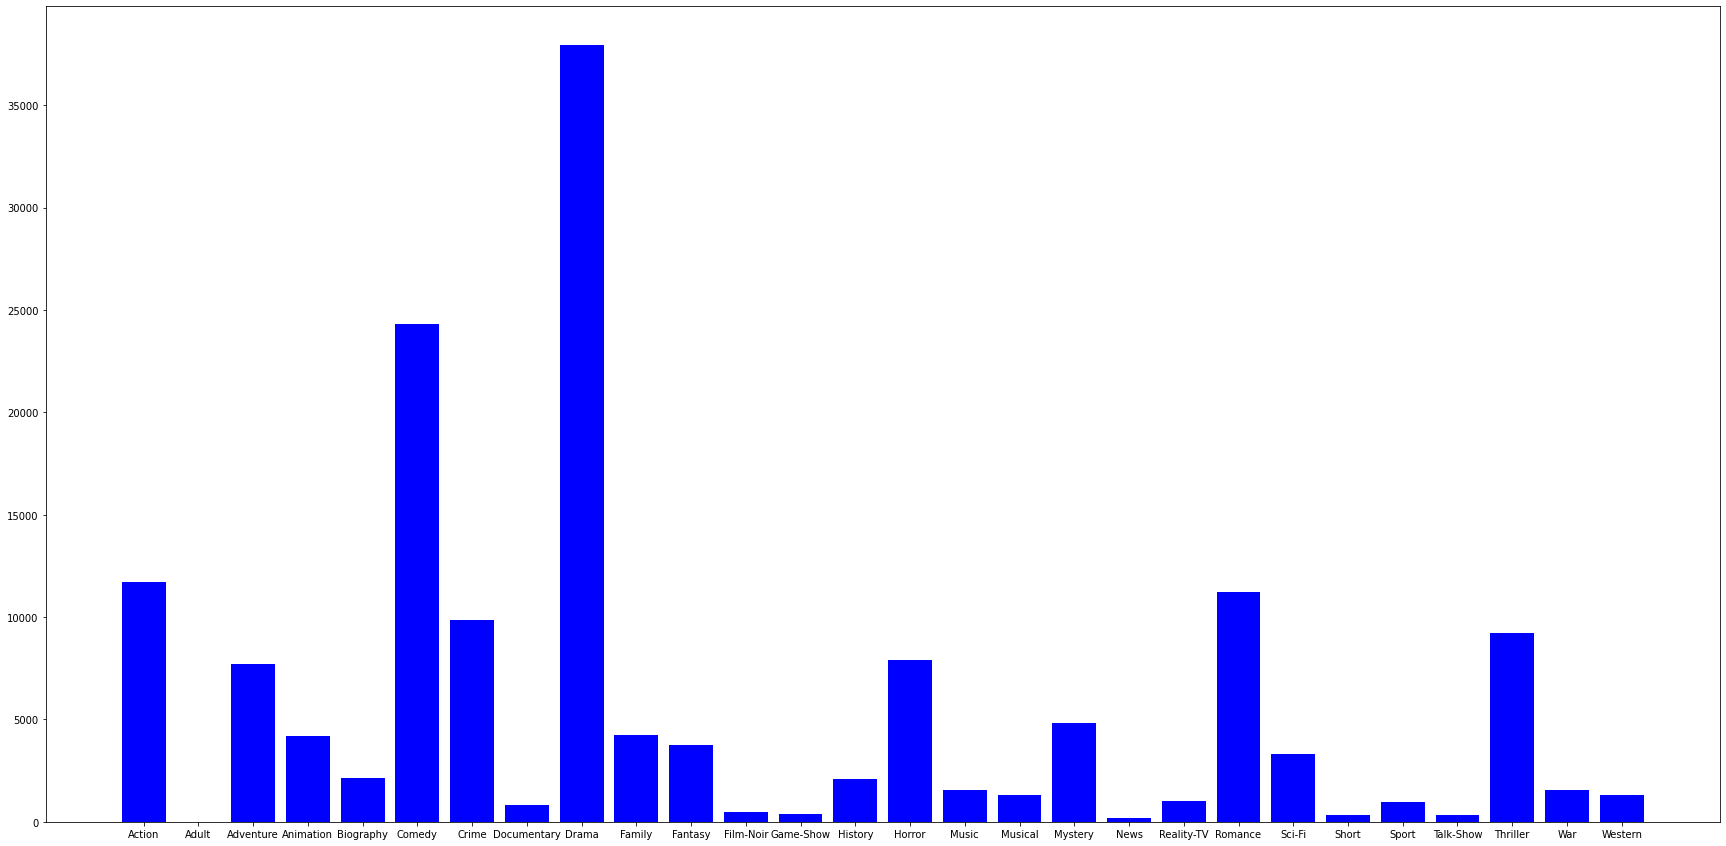

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,15))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.bar(genresdf['genre'], genresdf['count'], color="blue")


In [ ]:
data2

,title,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,rating,runtime,genre_1,genre_2,genre_3
0,"""Giliap""",A man arrives in a Swedish port city to work a...,Thommy Berggren,Mona Seilitz,Willie AndrÃ©ason,Lars-Levi LÃ¦stadius,1975,None,Movie,6.3,137.0,Crime,Drama,None
1,#69 Samskar Colony,"Koushik, a teenage boy, moves to the city with...",Ajay,Fm Babai,Badram,Bapiraju,2022,None,Movie,7.7,126.0,Romance,None,None
2,#Alive,The rapid spread of an unknown infection has l...,Yoo Ah-in,Park Shin-Hye,Jeon Bae-soo,Hyun-Wook Lee,2020,None,Movie,6.3,98.0,Action,Drama,Horror
3,#AnneFrank. Parallel Stories,It is based on five women who did survive the ...,Anna Migotto,Helen Mirren,Anne Frank,Martina Gatti,2019,None,Movie,6.5,92.0,Drama,History,None
4,#BlackAF,A father takes an irreverent and honest approa...,Kenya Barris,Iman Benson,Genneya Walton,None,2020,None,Movie,6.7,36.0,Comedy,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88508,ÃÃ§ Harfliler 2: Hablis,A happily married couple will begin to experie...,ÃzgÃ¼r Bakar,Alper Kivicim,Funda Aksoy,Elvan Albat,2015,None,Movie,3.6,104.0,Horror,None,None
88509,ÃÃ§ Harfliler 3: KarabÃ¼yÃ¼,Kadir is a man victimized to his mother's blac...,Seda Oguz,Ãzay Fecht,Deniz GÃ¼ndogdu,Metin Yildirim,2016,None,Movie,5.8,87.0,Horror,None,None
88510,ÃÃ§ Harfliler: Adak,Salih was shot with a rifle in the forest wher...,Ramazan Demir,Ceren Yilmaz,Ejder Ãzkarsligil,Simge Uluer,2019,None,Movie,5.0,91.0,Horror,Thriller,None
88511,ÃÃ§ KagitÃ§i,Rifki has lots of luck everything seems to go ...,Kemal Sunal,ÃlkÃ¼ Ãzen,Ali Sen,Turgut Ãzatay,1981,None,Movie,7.7,88.0,Comedy,None,None


In [ ]:
data3 = data2.drop(['genre_1','genre_2','genre_3'], axis = 1)

In [ ]:
data3 = data3.reset_index(drop = True)

In [ ]:
data3 = data3.join(genres)

In [ ]:
data3

,title,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,rating,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""Giliap""",A man arrives in a Swedish port city to work a...,Thommy Berggren,Mona Seilitz,Willie AndrÃ©ason,Lars-Levi LÃ¦stadius,1975,None,Movie,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,#69 Samskar Colony,"Koushik, a teenage boy, moves to the city with...",Ajay,Fm Babai,Badram,Bapiraju,2022,None,Movie,7.7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,#Alive,The rapid spread of an unknown infection has l...,Yoo Ah-in,Park Shin-Hye,Jeon Bae-soo,Hyun-Wook Lee,2020,None,Movie,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#AnneFrank. Parallel Stories,It is based on five women who did survive the ...,Anna Migotto,Helen Mirren,Anne Frank,Martina Gatti,2019,None,Movie,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#BlackAF,A father takes an irreverent and honest approa...,Kenya Barris,Iman Benson,Genneya Walton,None,2020,None,Movie,6.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72823,ÃÃ§ Harfliler 2: Hablis,A happily married couple will begin to experie...,ÃzgÃ¼r Bakar,Alper Kivicim,Funda Aksoy,Elvan Albat,2015,None,Movie,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72824,ÃÃ§ Harfliler 3: KarabÃ¼yÃ¼,Kadir is a man victimized to his mother's blac...,Seda Oguz,Ãzay Fecht,Deniz GÃ¼ndogdu,Metin Yildirim,2016,None,Movie,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72825,ÃÃ§ Harfliler: Adak,Salih was shot with a rifle in the forest wher...,Ramazan Demir,Ceren Yilmaz,Ejder Ãzkarsligil,Simge Uluer,2019,None,Movie,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72826,ÃÃ§ KagitÃ§i,Rifki has lots of luck everything seems to go ...,Kemal Sunal,ÃlkÃ¼ Ãzen,Ali Sen,Turgut Ãzatay,1981,None,Movie,7.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cleaning of feature **release_year**, **runtime**, **ratings**

In [ ]:
data3['release_year'].unique()

array(['1975', '2022', '2020', '2019', '2017', '2018', '2021', '2015',
       '2016', '2014', '2010', '1967', '2008', '2013', '1986', '1982',
       '1952', '1999', '1935', '1943', '1934', '1941', '2001', '1997',
       '1971', '1961', '2004', '2009', '1987', '1979', '1974', '1968',
       '1939', '2005', '2006', '2002', '1965', '2012', '2011', '1994',
       '1976', '1993', '1963', '1983', '2003', '1991', '2000', '1969',
       '1959', '1996', '1966', '1989', '2007', '1957', '1964', '1960',
       'I 2010', '1946', '1928', '1962', '1973', '1992', '1972',
       'III 2021', '1988', '1980', '1985', 'I 2018', 'I 2019', '1984',
       '1977', 'I 2015', '1954', '1932', '1978', 'I 2009', 'II 2021',
       'III 2020', '1940', '1998', '1956', '1926', '1990', '1995', '1981',
       'I 2012', 'I', '1933', '1955', 'I 2016', 'I 2017', 'I 2021',
       'II 2014', 'II 2020', '1950', '1958', 'II 2015', 'II 2018', '1953',
       '1945', '1970', '1944', '1937', '1949', '1948', '1942', '1916',
       '

In [ ]:
wordlst = ['-','X','VII','XI','IX','XV','VIII','XIV','Video','TV Special','I','TV Movie','TV Short','TV Special','III','IV ','Music Video','II','VI', 'V', 'Music']           

In [ ]:
for i in wordlst:
  data3['release_year'] = data3['release_year'].str.replace(i, '')
  data3['release_year'] = data3['release_year'].str.strip()


In [ ]:
len(data3['release_year'].unique())

115

In [ ]:
removerow = data3[data3['release_year']== '']
data3 = pd.concat([data3,removerow]).drop_duplicates(keep=False)

In [ ]:
len(data3.release_year.unique())

114

In [ ]:
data3.shape

(72727, 39)

In [ ]:
data3['rating'] = data3['rating'].round(1)
data3['runtime'] = data3['runtime'].round(1)

In [ ]:
data3

,title,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,rating,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""Giliap""",A man arrives in a Swedish port city to work a...,Thommy Berggren,Mona Seilitz,Willie AndrÃ©ason,Lars-Levi LÃ¦stadius,1975,None,Movie,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,#69 Samskar Colony,"Koushik, a teenage boy, moves to the city with...",Ajay,Fm Babai,Badram,Bapiraju,2022,None,Movie,7.7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,#Alive,The rapid spread of an unknown infection has l...,Yoo Ah-in,Park Shin-Hye,Jeon Bae-soo,Hyun-Wook Lee,2020,None,Movie,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#AnneFrank. Parallel Stories,It is based on five women who did survive the ...,Anna Migotto,Helen Mirren,Anne Frank,Martina Gatti,2019,None,Movie,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#BlackAF,A father takes an irreverent and honest approa...,Kenya Barris,Iman Benson,Genneya Walton,None,2020,None,Movie,6.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72823,ÃÃ§ Harfliler 2: Hablis,A happily married couple will begin to experie...,ÃzgÃ¼r Bakar,Alper Kivicim,Funda Aksoy,Elvan Albat,2015,None,Movie,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72824,ÃÃ§ Harfliler 3: KarabÃ¼yÃ¼,Kadir is a man victimized to his mother's blac...,Seda Oguz,Ãzay Fecht,Deniz GÃ¼ndogdu,Metin Yildirim,2016,None,Movie,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72825,ÃÃ§ Harfliler: Adak,Salih was shot with a rifle in the forest wher...,Ramazan Demir,Ceren Yilmaz,Ejder Ãzkarsligil,Simge Uluer,2019,None,Movie,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72826,ÃÃ§ KagitÃ§i,Rifki has lots of luck everything seems to go ...,Kemal Sunal,ÃlkÃ¼ Ãzen,Ali Sen,Turgut Ãzatay,1981,None,Movie,7.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Assigning of variables to type feature ##
</br>
0 = Movies
</br>
1 = TV shows

In [ ]:
data3[data3.type == 'Movie']

,title,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,rating,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""Giliap""",A man arrives in a Swedish port city to work a...,Thommy Berggren,Mona Seilitz,Willie AndrÃ©ason,Lars-Levi LÃ¦stadius,1975,None,Movie,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,#69 Samskar Colony,"Koushik, a teenage boy, moves to the city with...",Ajay,Fm Babai,Badram,Bapiraju,2022,None,Movie,7.7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,#Alive,The rapid spread of an unknown infection has l...,Yoo Ah-in,Park Shin-Hye,Jeon Bae-soo,Hyun-Wook Lee,2020,None,Movie,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#AnneFrank. Parallel Stories,It is based on five women who did survive the ...,Anna Migotto,Helen Mirren,Anne Frank,Martina Gatti,2019,None,Movie,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#BlackAF,A father takes an irreverent and honest approa...,Kenya Barris,Iman Benson,Genneya Walton,None,2020,None,Movie,6.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72821,ÃzgÃ¼r DÃ¼nya,The story of a game managed by artificial inte...,Sevki Es,Murat Serezli,Rabia Soyturk,GÃ¼rbey Ileri,2019,None,Movie,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72823,ÃÃ§ Harfliler 2: Hablis,A happily married couple will begin to experie...,ÃzgÃ¼r Bakar,Alper Kivicim,Funda Aksoy,Elvan Albat,2015,None,Movie,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72824,ÃÃ§ Harfliler 3: KarabÃ¼yÃ¼,Kadir is a man victimized to his mother's blac...,Seda Oguz,Ãzay Fecht,Deniz GÃ¼ndogdu,Metin Yildirim,2016,None,Movie,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72825,ÃÃ§ Harfliler: Adak,Salih was shot with a rifle in the forest wher...,Ramazan Demir,Ceren Yilmaz,Ejder Ãzkarsligil,Simge Uluer,2019,None,Movie,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#Movie = 0
#TV Show = 1
data3['type'].loc[(data3['type'] == 'Movie')] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data3['type'].loc[(data3['type'] == 'TV Show')] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data3[data3.type == 0]

,title,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,rating,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""Giliap""",A man arrives in a Swedish port city to work a...,Thommy Berggren,Mona Seilitz,Willie AndrÃ©ason,Lars-Levi LÃ¦stadius,1975,None,0,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,#69 Samskar Colony,"Koushik, a teenage boy, moves to the city with...",Ajay,Fm Babai,Badram,Bapiraju,2022,None,0,7.7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,#Alive,The rapid spread of an unknown infection has l...,Yoo Ah-in,Park Shin-Hye,Jeon Bae-soo,Hyun-Wook Lee,2020,None,0,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#AnneFrank. Parallel Stories,It is based on five women who did survive the ...,Anna Migotto,Helen Mirren,Anne Frank,Martina Gatti,2019,None,0,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#BlackAF,A father takes an irreverent and honest approa...,Kenya Barris,Iman Benson,Genneya Walton,None,2020,None,0,6.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72821,ÃzgÃ¼r DÃ¼nya,The story of a game managed by artificial inte...,Sevki Es,Murat Serezli,Rabia Soyturk,GÃ¼rbey Ileri,2019,None,0,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72823,ÃÃ§ Harfliler 2: Hablis,A happily married couple will begin to experie...,ÃzgÃ¼r Bakar,Alper Kivicim,Funda Aksoy,Elvan Albat,2015,None,0,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72824,ÃÃ§ Harfliler 3: KarabÃ¼yÃ¼,Kadir is a man victimized to his mother's blac...,Seda Oguz,Ãzay Fecht,Deniz GÃ¼ndogdu,Metin Yildirim,2016,None,0,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72825,ÃÃ§ Harfliler: Adak,Salih was shot with a rifle in the forest wher...,Ramazan Demir,Ceren Yilmaz,Ejder Ãzkarsligil,Simge Uluer,2019,None,0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data3

,title,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,rating,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""Giliap""",A man arrives in a Swedish port city to work a...,Thommy Berggren,Mona Seilitz,Willie AndrÃ©ason,Lars-Levi LÃ¦stadius,1975,None,0,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,#69 Samskar Colony,"Koushik, a teenage boy, moves to the city with...",Ajay,Fm Babai,Badram,Bapiraju,2022,None,0,7.7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,#Alive,The rapid spread of an unknown infection has l...,Yoo Ah-in,Park Shin-Hye,Jeon Bae-soo,Hyun-Wook Lee,2020,None,0,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#AnneFrank. Parallel Stories,It is based on five women who did survive the ...,Anna Migotto,Helen Mirren,Anne Frank,Martina Gatti,2019,None,0,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#BlackAF,A father takes an irreverent and honest approa...,Kenya Barris,Iman Benson,Genneya Walton,None,2020,None,0,6.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72823,ÃÃ§ Harfliler 2: Hablis,A happily married couple will begin to experie...,ÃzgÃ¼r Bakar,Alper Kivicim,Funda Aksoy,Elvan Albat,2015,None,0,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72824,ÃÃ§ Harfliler 3: KarabÃ¼yÃ¼,Kadir is a man victimized to his mother's blac...,Seda Oguz,Ãzay Fecht,Deniz GÃ¼ndogdu,Metin Yildirim,2016,None,0,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72825,ÃÃ§ Harfliler: Adak,Salih was shot with a rifle in the forest wher...,Ramazan Demir,Ceren Yilmaz,Ejder Ãzkarsligil,Simge Uluer,2019,None,0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72826,ÃÃ§ KagitÃ§i,Rifki has lots of luck everything seems to go ...,Kemal Sunal,ÃlkÃ¼ Ãzen,Ali Sen,Turgut Ãzatay,1981,None,0,7.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Seperating of x and y variables

In [ ]:
y = data3[['rating']]

In [ ]:
x = data3.drop('rating',axis=1)

In [ ]:
x

,title,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,runtime,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""Giliap""",A man arrives in a Swedish port city to work a...,Thommy Berggren,Mona Seilitz,Willie AndrÃ©ason,Lars-Levi LÃ¦stadius,1975,None,0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,#69 Samskar Colony,"Koushik, a teenage boy, moves to the city with...",Ajay,Fm Babai,Badram,Bapiraju,2022,None,0,126.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,#Alive,The rapid spread of an unknown infection has l...,Yoo Ah-in,Park Shin-Hye,Jeon Bae-soo,Hyun-Wook Lee,2020,None,0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#AnneFrank. Parallel Stories,It is based on five women who did survive the ...,Anna Migotto,Helen Mirren,Anne Frank,Martina Gatti,2019,None,0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#BlackAF,A father takes an irreverent and honest approa...,Kenya Barris,Iman Benson,Genneya Walton,None,2020,None,0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72823,ÃÃ§ Harfliler 2: Hablis,A happily married couple will begin to experie...,ÃzgÃ¼r Bakar,Alper Kivicim,Funda Aksoy,Elvan Albat,2015,None,0,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72824,ÃÃ§ Harfliler 3: KarabÃ¼yÃ¼,Kadir is a man victimized to his mother's blac...,Seda Oguz,Ãzay Fecht,Deniz GÃ¼ndogdu,Metin Yildirim,2016,None,0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72825,ÃÃ§ Harfliler: Adak,Salih was shot with a rifle in the forest wher...,Ramazan Demir,Ceren Yilmaz,Ejder Ãzkarsligil,Simge Uluer,2019,None,0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72826,ÃÃ§ KagitÃ§i,Rifki has lots of luck everything seems to go ...,Kemal Sunal,ÃlkÃ¼ Ãzen,Ali Sen,Turgut Ãzatay,1981,None,0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Standardising of **cast/directors** name

In [ ]:
# standardising the cast/directors name 
x['cast-1'] = x['cast-1'].str.lower()
x['cast-1'] = x['cast-1'].str.replace(" ", '')
x['cast-1'] = x['cast-1'].str.replace("-", '')
x['cast-1'] = x['cast-1'].str.replace("'", '')
x['cast-1'] = x['cast-1'].str.replace("'", '')
x['cast-2'] = x['cast-2'].str.lower()
x['cast-2'] = x['cast-2'].str.replace(" ", '')
x['cast-2'] = x['cast-2'].str.replace("-", '')
x['cast-2'] = x['cast-2'].str.replace("'", '')
x['cast-2'] = x['cast-2'].str.replace("'", '')
x['cast-3'] = x['cast-3'].str.lower()
x['cast-3'] = x['cast-3'].str.replace(" ", '')
x['cast-3'] = x['cast-3'].str.replace("-", '')
x['cast-3'] = x['cast-3'].str.replace("'", '')
x['cast-3'] = x['cast-3'].str.replace("'", '')
x['cast-4'] = x['cast-4'].str.lower()
x['cast-4'] = x['cast-4'].str.replace(" ", '')
x['cast-4'] = x['cast-4'].str.replace("-", '')
x['cast-4'] = x['cast-4'].str.replace("'", '')
x['cast-4'] = x['cast-4'].str.replace("'", '')

In [ ]:
x

,title,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,runtime,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""Giliap""",A man arrives in a Swedish port city to work a...,thommyberggren,monaseilitz,willieandrã©ason,larslevilã¦stadius,1975,None,0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,#69 Samskar Colony,"Koushik, a teenage boy, moves to the city with...",ajay,fmbabai,badram,bapiraju,2022,None,0,126.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,#Alive,The rapid spread of an unknown infection has l...,yooahin,parkshinhye,jeonbaesoo,hyunwooklee,2020,None,0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#AnneFrank. Parallel Stories,It is based on five women who did survive the ...,annamigotto,helenmirren,annefrank,martinagatti,2019,None,0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#BlackAF,A father takes an irreverent and honest approa...,kenyabarris,imanbenson,genneyawalton,None,2020,None,0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72823,ÃÃ§ Harfliler 2: Hablis,A happily married couple will begin to experie...,ãzgã¼rbakar,alperkivicim,fundaaksoy,elvanalbat,2015,None,0,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72824,ÃÃ§ Harfliler 3: KarabÃ¼yÃ¼,Kadir is a man victimized to his mother's blac...,sedaoguz,ãzayfecht,denizgã¼ndogdu,metinyildirim,2016,None,0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72825,ÃÃ§ Harfliler: Adak,Salih was shot with a rifle in the forest wher...,ramazandemir,cerenyilmaz,ejderãzkarsligil,simgeuluer,2019,None,0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72826,ÃÃ§ KagitÃ§i,Rifki has lots of luck everything seems to go ...,kemalsunal,ãlkã¼ãzen,alisen,turgutãzatay,1981,None,0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Splitting of Dataframe to train test set**

In [ ]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=2022)

In [ ]:
x_train.shape

(58181, 38)

In [ ]:
y_train.shape

(58181, 1)

# **One-Hot Encode on casts/directors for both train and test set**

In [ ]:
cast_1= list(x_train['cast-1'].unique())
len(cast_1)

32278

In [ ]:
cast_2= list(x_train['cast-2'].unique())
len(cast_2) 

36180

In [ ]:
cast_3= list(x_train['cast-3'].unique())
len(cast_3) 

39326

In [ ]:
cast_4= list(x_train['cast-4'].unique())
len(cast_4) 

34228

In [ ]:
cast_1.extend(cast_2)

In [ ]:
cast_1.extend(cast_3)

In [ ]:
cast_1.extend(cast_4)

In [ ]:
len(cast_1)

142012

In [ ]:
casts = pd.DataFrame(cast_1, columns = ['Cast'])

In [ ]:
casts = casts.drop_duplicates()
casts

,Cast
0,paulhiggins
1,w.c.fields
2,stevebrodie
3,giannisbezos
4,jonvoight
...,...
142004,ãvarãã³rbenediktsson
142006,kivanã§baranaslan
142008,madiekhtiardini
142009,darrenkelfkens


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc_cast = OneHotEncoder(categories='auto',handle_unknown='ignore')
enc_cast.fit(casts)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
castnames = enc_cast.get_feature_names_out()

In [ ]:
len(castnames)

99441

In [ ]:
cast_1 = enc_cast.transform(x_train[['cast-1']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cast-1
Feature names seen at fit time, yet now missing:
- Cast

  warnings.warn(message, FutureWarning)


In [ ]:
cast_2 = enc_cast.transform(x_train[['cast-2']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cast-2
Feature names seen at fit time, yet now missing:
- Cast

  warnings.warn(message, FutureWarning)


In [ ]:
cast_3 = enc_cast.transform(x_train[['cast-3']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cast-3
Feature names seen at fit time, yet now missing:
- Cast

  warnings.warn(message, FutureWarning)


In [ ]:
cast_4 = enc_cast.transform(x_train[['cast-4']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cast-4
Feature names seen at fit time, yet now missing:
- Cast

  warnings.warn(message, FutureWarning)


In [ ]:
cast_matrix = cast_1+ cast_2 + cast_3+ cast_4

In [ ]:
cast_matrix.shape

(58181, 99441)

In [ ]:
castdf = pd.DataFrame.sparse.from_spmatrix(cast_matrix, columns = castnames)

In [ ]:
castdf

,Cast_.v.j.vishal,Cast_50cent,Cast_5gang,Cast_a.belle,Cast_a.blainemiller,Cast_a.c.lyles,Cast_a.d.miles,Cast_a.e.matthews,Cast_a.edwardsutherland,Cast_a.galak,...,Cast_ãorsteinnbachmann,Cast_ãorsteinnguã°mundsson,Cast_ãrã¶sturleã³gunnarsson,Cast_ãrãºã°urvilhjã¡lmsdã³ttir,Cast_ãurã­ã°urblã¦rjã³hannsdã³ttir,Cast_ãã³rhallursigurã°sson,Cast_ãã³rirwaagfjã¶rã°,Cast_ãã³rtulinius,Cast_ãã³runnarnakristjã¡nsdã³ttir,Cast_None
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
castdf = castdf.drop('Cast_None', axis = 1)

In [ ]:
castdf

,Cast_.v.j.vishal,Cast_50cent,Cast_5gang,Cast_a.belle,Cast_a.blainemiller,Cast_a.c.lyles,Cast_a.d.miles,Cast_a.e.matthews,Cast_a.edwardsutherland,Cast_a.galak,...,Cast_ãnalgã¼rel,Cast_ãorsteinnbachmann,Cast_ãorsteinnguã°mundsson,Cast_ãrã¶sturleã³gunnarsson,Cast_ãrãºã°urvilhjã¡lmsdã³ttir,Cast_ãurã­ã°urblã¦rjã³hannsdã³ttir,Cast_ãã³rhallursigurã°sson,Cast_ãã³rirwaagfjã¶rã°,Cast_ãã³rtulinius,Cast_ãã³runnarnakristjã¡nsdã³ttir
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
actor = castdf.sum().sort_values(ascending = False)
actor

Cast_amitabhbachchan                  92.0
Cast_ericroberts                      89.0
Cast_gã©rarddepardieu                 84.0
Cast_johnwayne                        81.0
Cast_akshaykumar                      78.0
                                      ... 
Cast_jakeroxas                         1.0
Cast_jakerichardson                    1.0
Cast_jakepaul                          1.0
Cast_jakeparker                        1.0
Cast_ãã³runnarnakristjã¡nsdã³ttir     1.0
Length: 99440, dtype: float64

In [ ]:
actor = pd.DataFrame(actor, columns = {'Count'})
plotdata = actor.reset_index()

In [ ]:
top10plotdata = plotdata.iloc[:10,]

In [ ]:
actor

,Count
Cast_amitabhbachchan,92.0
Cast_ericroberts,89.0
Cast_gã©rarddepardieu,84.0
Cast_johnwayne,81.0
Cast_akshaykumar,78.0
...,...
Cast_jakeroxas,1.0
Cast_jakerichardson,1.0
Cast_jakepaul,1.0
Cast_jakeparker,1.0


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

<BarContainer object of 10 artists>

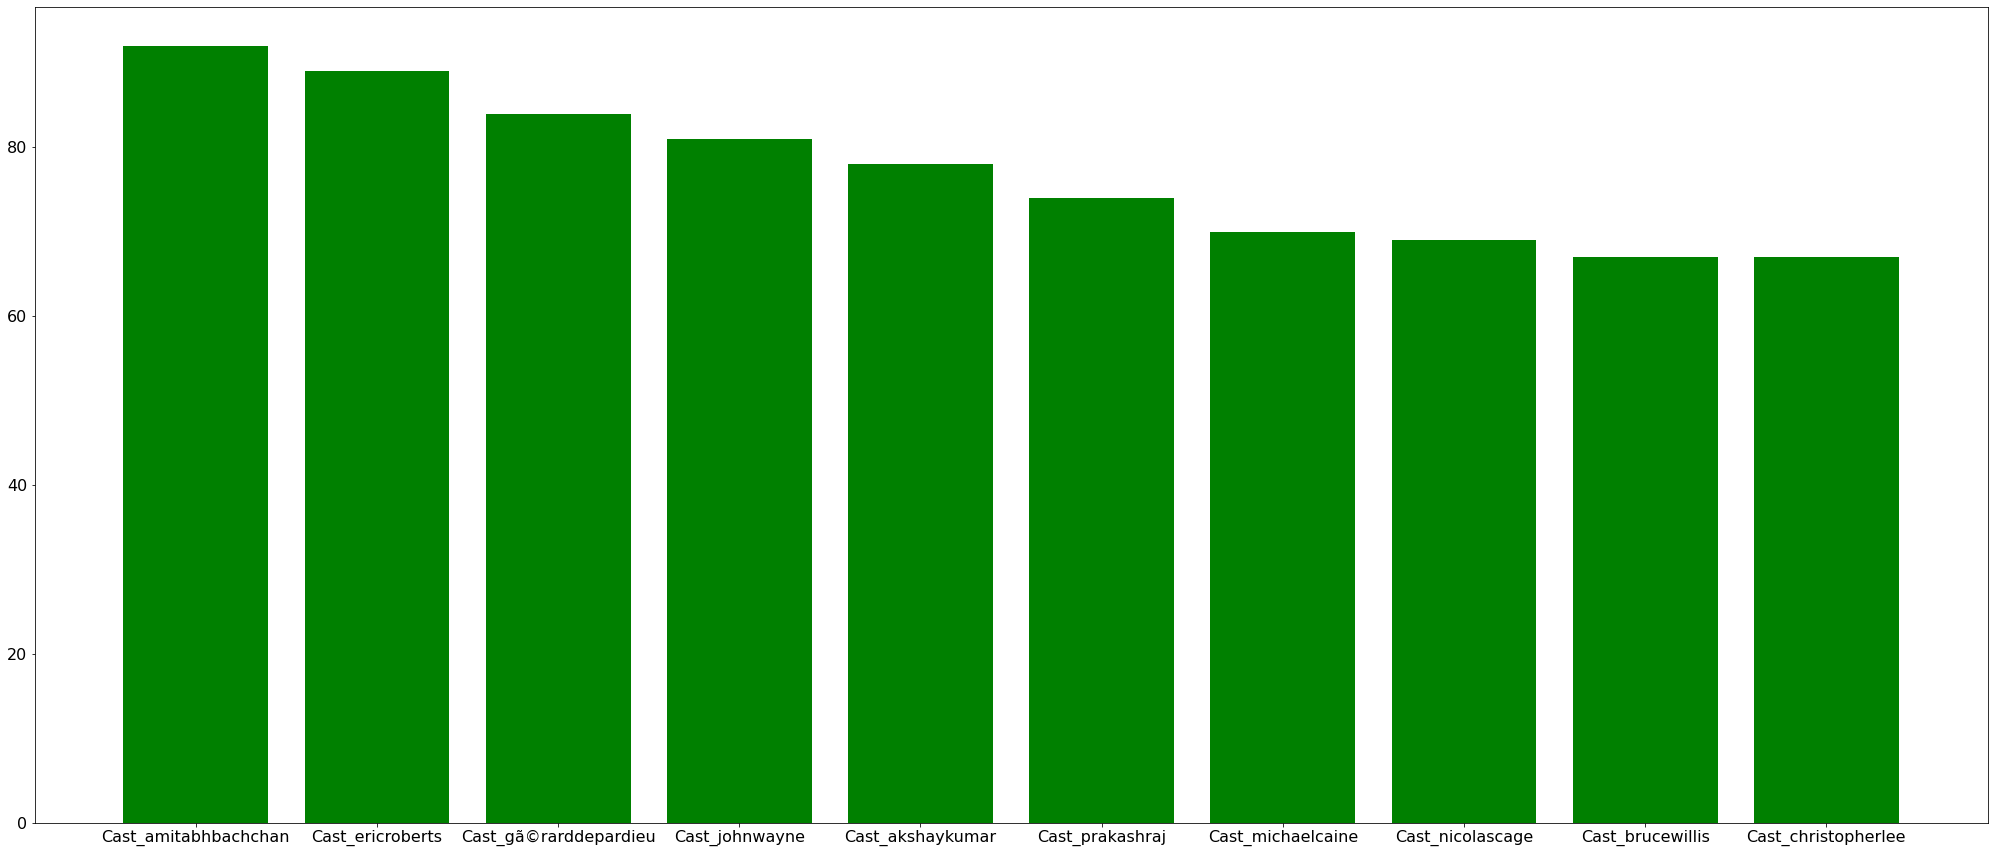

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (35,15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.bar(top10plotdata['index'], top10plotdata['Count'], color="green")

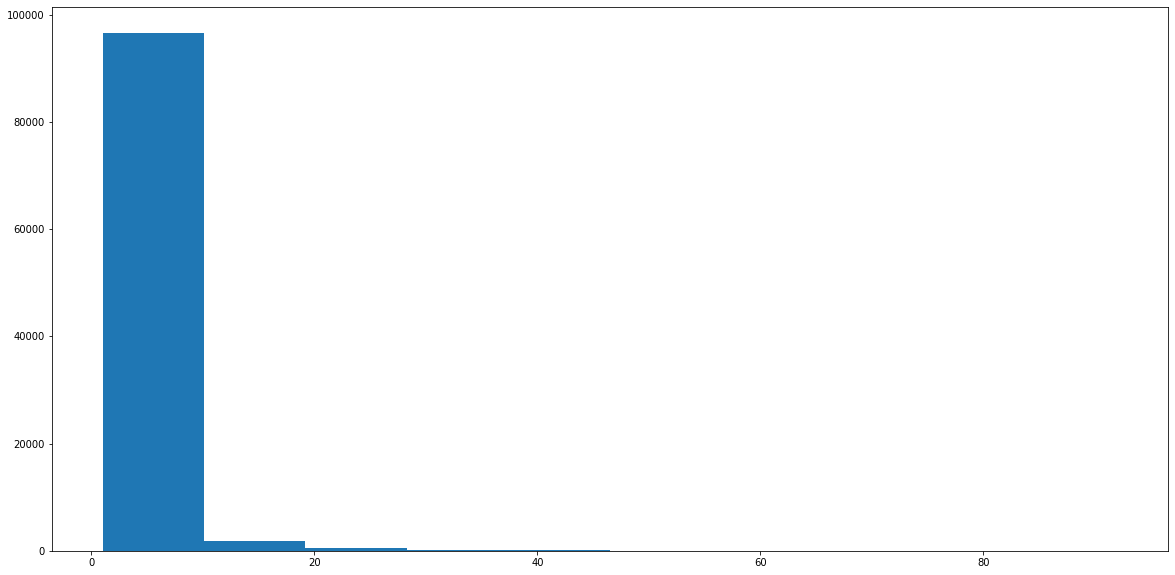

In [ ]:
plt.figure(figsize = (20,10))
plt.hist(actor['Count'])
plt.show()

In [ ]:
#getting the top actors
topactor = actor[actor['Count'] >= 20]
topactor.reset_index()

,index,Count
0,Cast_amitabhbachchan,92.0
1,Cast_ericroberts,89.0
2,Cast_gã©rarddepardieu,84.0
3,Cast_johnwayne,81.0
4,Cast_akshaykumar,78.0
...,...,...
975,Cast_jasonisaacs,20.0
976,Cast_michaelyork,20.0
977,Cast_harrydeanstanton,20.0
978,Cast_michaelpeã±a,20.0


In [ ]:
topactorlist = topactor.index
topactorlist = list(topactorlist)
len(topactorlist)

980

In [ ]:
x_train = x_train.reset_index(drop=True)

In [ ]:
x_train

,title,description,cast-1,cast-2,cast-3,cast-4,release_year,end_year,type,runtime,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Couple in a Hole,"Devastated by the death of their only son, a m...",paulhiggins,katedickie,jã©rã´mekircher,corinnemasiero,2015,None,0,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,You're Telling Me!,"A hard-drinking, socially-awkward inventor wre...",w.c.fields,joanmarsh,bustercrabbe,adrienneames,1934,None,0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Giant Spider Invasion,Giant spiders from another dimension invade Wi...,stevebrodie,barbarahale,roberteaston,leslieparrish,1975,None,0,84.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Christmas Tango,"At the time of the Greek junta, in an isolated...",giannisbezos,giannisstankoglou,antinoosalbanis,vickypapadopoulou,2011,None,0,102.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The All-American Boy,"Episodic story in six acts (""The Manly Art in ...",jonvoight,nanciephillips,artmetrano,kathymahoney,1973,None,0,118.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,The Endless River,Gilles and Tiny are both mourning recent death...,nicolasduvauchelle,crystaldonnaroberts,claytonevertson,darrenkelfkens,2015,None,0,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58177,Yesterday Once More,Romance blossoms again for a divorced jewel-th...,andylau,sammicheng,jennyhu,carlng,2004,None,0,99.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58178,Runner,After her boyfriend has a psychotic episode an...,zygimantejakstaite,mariusrepsys,laimaakstinaite,vytautaskaniusonis,2021,None,1,87.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58179,Don't Panic Chaps,Charming farce about British and German soldie...,dennisprice,georgecole,thorleywalters,nadjaregin,1959,None,0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x_train = x_train.drop(['cast-1','cast-2','cast-3','cast-4'], axis=1)
x_train

,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Couple in a Hole,"Devastated by the death of their only son, a m...",2015,None,0,105.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,You're Telling Me!,"A hard-drinking, socially-awkward inventor wre...",1934,None,0,66.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Giant Spider Invasion,Giant spiders from another dimension invade Wi...,1975,None,0,84.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Christmas Tango,"At the time of the Greek junta, in an isolated...",2011,None,0,102.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The All-American Boy,"Episodic story in six acts (""The Manly Art in ...",1973,None,0,118.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,The Endless River,Gilles and Tiny are both mourning recent death...,2015,None,0,108.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58177,Yesterday Once More,Romance blossoms again for a divorced jewel-th...,2004,None,0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58178,Runner,After her boyfriend has a psychotic episode an...,2021,None,1,87.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58179,Don't Panic Chaps,Charming farce about British and German soldie...,1959,None,0,85.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
casts = castdf[topactorlist]

In [ ]:
casts

,Cast_amitabhbachchan,Cast_ericroberts,Cast_gã©rarddepardieu,Cast_johnwayne,Cast_akshaykumar,Cast_prakashraj,Cast_michaelcaine,Cast_nicolascage,Cast_brucewillis,Cast_christopherlee,...,Cast_terencehill,Cast_zoesaldana,Cast_sallyfield,Cast_imogenpoots,Cast_sunildutt,Cast_jasonisaacs,Cast_michaelyork,Cast_harrydeanstanton,Cast_michaelpeã±a,Cast_margotkidder
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train = pd.concat([x_train,casts], axis =1)

In [ ]:
x_train

,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,Cast_terencehill,Cast_zoesaldana,Cast_sallyfield,Cast_imogenpoots,Cast_sunildutt,Cast_jasonisaacs,Cast_michaelyork,Cast_harrydeanstanton,Cast_michaelpeã±a,Cast_margotkidder
0,Couple in a Hole,"Devastated by the death of their only son, a m...",2015,None,0,105.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,You're Telling Me!,"A hard-drinking, socially-awkward inventor wre...",1934,None,0,66.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Giant Spider Invasion,Giant spiders from another dimension invade Wi...,1975,None,0,84.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Christmas Tango,"At the time of the Greek junta, in an isolated...",2011,None,0,102.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The All-American Boy,"Episodic story in six acts (""The Manly Art in ...",1973,None,0,118.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,The Endless River,Gilles and Tiny are both mourning recent death...,2015,None,0,108.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58177,Yesterday Once More,Romance blossoms again for a divorced jewel-th...,2004,None,0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58178,Runner,After her boyfriend has a psychotic episode an...,2021,None,1,87.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58179,Don't Panic Chaps,Charming farce about British and German soldie...,1959,None,0,85.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cast_1_test = enc_cast.transform(x_test[['cast-1']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cast-1
Feature names seen at fit time, yet now missing:
- Cast

  warnings.warn(message, FutureWarning)


In [ ]:
cast_2_test = enc_cast.transform(x_test[['cast-2']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cast-2
Feature names seen at fit time, yet now missing:
- Cast

  warnings.warn(message, FutureWarning)


In [ ]:
cast_3_test = enc_cast.transform(x_test[['cast-3']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cast-3
Feature names seen at fit time, yet now missing:
- Cast

  warnings.warn(message, FutureWarning)


In [ ]:
cast_4_test = enc_cast.transform(x_test[['cast-4']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cast-4
Feature names seen at fit time, yet now missing:
- Cast

  warnings.warn(message, FutureWarning)


In [ ]:
cast_matrix_test = cast_1_test+ cast_2_test + cast_3_test + cast_4_test

In [ ]:
castdf_test = pd.DataFrame.sparse.from_spmatrix(cast_matrix_test, columns = castnames)

In [ ]:
castdf_test

,Cast_.v.j.vishal,Cast_50cent,Cast_5gang,Cast_a.belle,Cast_a.blainemiller,Cast_a.c.lyles,Cast_a.d.miles,Cast_a.e.matthews,Cast_a.edwardsutherland,Cast_a.galak,...,Cast_ãorsteinnbachmann,Cast_ãorsteinnguã°mundsson,Cast_ãrã¶sturleã³gunnarsson,Cast_ãrãºã°urvilhjã¡lmsdã³ttir,Cast_ãurã­ã°urblã¦rjã³hannsdã³ttir,Cast_ãã³rhallursigurã°sson,Cast_ãã³rirwaagfjã¶rã°,Cast_ãã³rtulinius,Cast_ãã³runnarnakristjã¡nsdã³ttir,Cast_None
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
castdf_test = castdf_test.drop('Cast_None', axis = 1)

In [ ]:
castdf_test

,Cast_.v.j.vishal,Cast_50cent,Cast_5gang,Cast_a.belle,Cast_a.blainemiller,Cast_a.c.lyles,Cast_a.d.miles,Cast_a.e.matthews,Cast_a.edwardsutherland,Cast_a.galak,...,Cast_ãnalgã¼rel,Cast_ãorsteinnbachmann,Cast_ãorsteinnguã°mundsson,Cast_ãrã¶sturleã³gunnarsson,Cast_ãrãºã°urvilhjã¡lmsdã³ttir,Cast_ãurã­ã°urblã¦rjã³hannsdã³ttir,Cast_ãã³rhallursigurã°sson,Cast_ãã³rirwaagfjã¶rã°,Cast_ãã³rtulinius,Cast_ãã³runnarnakristjã¡nsdã³ttir
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#using the top actor from train
casts_test = castdf_test[topactorlist]
casts_test

,Cast_amitabhbachchan,Cast_ericroberts,Cast_gã©rarddepardieu,Cast_johnwayne,Cast_akshaykumar,Cast_prakashraj,Cast_michaelcaine,Cast_nicolascage,Cast_brucewillis,Cast_christopherlee,...,Cast_terencehill,Cast_zoesaldana,Cast_sallyfield,Cast_imogenpoots,Cast_sunildutt,Cast_jasonisaacs,Cast_michaelyork,Cast_harrydeanstanton,Cast_michaelpeã±a,Cast_margotkidder
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_test = x_test.drop(['cast-1','cast-2','cast-3','cast-4'], axis=1)

In [ ]:
x_test = x_test.reset_index(drop = True)
x_test

,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,The Lost Tree,"After a serious traumatic accident, a man leav...",2016,None,0,88.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Another Day of Life,A gripping story of a three-month-long journey...,2018,None,0,85.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Two Years Before the Mast,The playboy son of a wealthy shipping magnate ...,1946,None,0,98.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Resurrection of Gavin Stone,"A washed-up former child star, forced to do co...",2017,None,0,91.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tales from the Golden Age,Several urban legends of Communist Romania are...,2009,None,0,155.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,The Structure of Crystal,Jan and Marek used to study physics together b...,1969,None,0,74.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14542,Run of the House,This show centers around two brothers and two ...,2003,2004,1,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14543,The Wiggles,Get ready to Wiggle with the Wiggles' TV serie...,1998,,1,30.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14544,White House Madness,Nixon finds his administration crumbling aroun...,1975,None,0,79.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_test = pd.concat([x_test,casts_test], axis = 1)

In [ ]:
x_test

,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,Cast_terencehill,Cast_zoesaldana,Cast_sallyfield,Cast_imogenpoots,Cast_sunildutt,Cast_jasonisaacs,Cast_michaelyork,Cast_harrydeanstanton,Cast_michaelpeã±a,Cast_margotkidder
0,The Lost Tree,"After a serious traumatic accident, a man leav...",2016,None,0,88.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Another Day of Life,A gripping story of a three-month-long journey...,2018,None,0,85.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Two Years Before the Mast,The playboy son of a wealthy shipping magnate ...,1946,None,0,98.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Resurrection of Gavin Stone,"A washed-up former child star, forced to do co...",2017,None,0,91.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tales from the Golden Age,Several urban legends of Communist Romania are...,2009,None,0,155.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,The Structure of Crystal,Jan and Marek used to study physics together b...,1969,None,0,74.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14542,Run of the House,This show centers around two brothers and two ...,2003,2004,1,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14543,The Wiggles,Get ready to Wiggle with the Wiggles' TV serie...,1998,,1,30.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14544,White House Madness,Nixon finds his administration crumbling aroun...,1975,None,0,79.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train.to_csv('/content/drive/My Drive/BT4222 group project/final_data/x_train.csv', index = False)
y_train.to_csv('/content/drive/My Drive/BT4222 group project/final_data/y_train.csv', index = False)
x_test.to_csv('/content/drive/My Drive/BT4222 group project/final_data/x_test.csv', index = False)
y_test.to_csv('/content/drive/My Drive/BT4222 group project/final_data/y_test.csv', index = False)

#**Keybert**

## Applying Keybert on training data

In [ ]:
!pip install keybert

     |████████████████████████████████| 79 kB 3.5 MB/s 
     |████████████████████████████████| 224 kB 10.8 MB/s 
     |████████████████████████████████| 51 kB 6.0 MB/s 
     |████████████████████████████████| 3.8 MB 53.4 MB/s 
     |████████████████████████████████| 1.2 MB 37.7 MB/s 
     |████████████████████████████████| 67 kB 2.3 MB/s 
     |████████████████████████████████| 6.5 MB 37.3 MB/s 
     |████████████████████████████████| 596 kB 71.0 MB/s 
     |████████████████████████████████| 895 kB 74.0 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=e977e07013d57332ab4da66895c02d07522f4dee8c2958e27d6e91fe6eb6516a
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=fe1d87dddda55251c524a4b9ef62d733f0457c65adfd9d96e335336248b545d2
  Stored in directory: /root/.cache/pip/whee

In [ ]:
from keybert import KeyBERT

In [ ]:
kw_model = KeyBERT(model='all-mpnet-base-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
x_train_desc = x_train['description'].str.lower().tolist()
x_train_desc

['devastated by the death of their only son, a middle-aged couple from scotland finds refuge in a man-made cave deep in the wilderness of the lush and undisturbed french woodlands.',
 "a hard-drinking, socially-awkward inventor wrecks his daughter's chances of marriage into a rich family and bungles his own chances of success by selling one of his more practical inventions.",
 'giant spiders from another dimension invade wisconsin.',
 'at the time of the greek junta, in an isolated army camp, a lieutenant forces a soldier to teach him the tango in order to ask the wife of his colonel to dance with him.',
 'episodic story in six acts ("the manly art in six rounds") about young boxer vic bealer (played by jon voight) in search for some direction in his life.',
 "one day kurt discovers that society basically does not respect forklift operators very much. his wife is an ambitious architect. his neighbor is a medical doctor. not even kurt's own kids ...                â\xa0â»",
 "a spirited

In [ ]:
# code to lemmatise list of sentences
import spacy
load_model = spacy.load('en', disable = ['parser','ner'])
def lemmatization(texts):
  texts_out = []
  for sent in texts:
    doc = load_model(sent)
    #doc = nlp(" ".join(sent)) 
    lem = " ".join([token.lemma_ for token in doc])
    texts_out.append(lem)
    #texts_out.append([token.lemma_ for token in doc])
  return texts_out

In [ ]:
# Do lemmatization
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
desc_lemmatized_train = lemmatization(x_train_desc)

In [ ]:
print(desc_lemmatized_train[0])
#original: devastated by the death of their only son, a middle-aged couple from scotland finds refuge in a man-made cave deep
# in the wilderness of the lush and undisturbed french woodlands.

# lemmatized: devastate by the death of -PRON- only son , a middle - aged couple from scotland find refuge in a man - make cave deep 
# in the wilderness of the lush and undisturbed french woodland .

devastate by the death of -PRON- only son , a middle - aged couple from scotland find refuge in a man - make cave deep in the wilderness of the lush and undisturbed french woodland .


In [ ]:
x_train_desc

['devastated by the death of their only son, a middle-aged couple from scotland finds refuge in a man-made cave deep in the wilderness of the lush and undisturbed french woodlands.',
 "a hard-drinking, socially-awkward inventor wrecks his daughter's chances of marriage into a rich family and bungles his own chances of success by selling one of his more practical inventions.",
 'giant spiders from another dimension invade wisconsin.',
 'at the time of the greek junta, in an isolated army camp, a lieutenant forces a soldier to teach him the tango in order to ask the wife of his colonel to dance with him.',
 'episodic story in six acts ("the manly art in six rounds") about young boxer vic bealer (played by jon voight) in search for some direction in his life.',
 "one day kurt discovers that society basically does not respect forklift operators very much. his wife is an ambitious architect. his neighbor is a medical doctor. not even kurt's own kids ...                â\xa0â»",
 "a spirited

In [ ]:
desc_lemmatized_train

['devastate by the death of -PRON- only son , a middle - aged couple from scotland find refuge in a man - make cave deep in the wilderness of the lush and undisturbed french woodland .',
 "a hard - drinking , socially - awkward inventor wreck -PRON- daughter 's chance of marriage into a rich family and bungle -PRON- own chance of success by sell one of -PRON- more practical invention .",
 'giant spider from another dimension invade wisconsin .',
 'at the time of the greek junta , in an isolate army camp , a lieutenant force a soldier to teach -PRON- the tango in order to ask the wife of -PRON- colonel to dance with -PRON- .',
 'episodic story in six act ( " the manly art in six round " ) about young boxer vic bealer ( play by jon voight ) in search for some direction in -PRON- life .',
 "one day kurt discover that society basically do not respect forklift operator very much . -PRON- wife be an ambitious architect . -PRON- neighbor be a medical doctor . not even kurt 's own kid ...     

In [ ]:
removed_pron_train = []
for sent in desc_lemmatized_train:
  sent = sent.replace('-PRON-','')
  removed_pron_train.append(sent)
removed_pron_train

['devastate by the death of  only son , a middle - aged couple from scotland find refuge in a man - make cave deep in the wilderness of the lush and undisturbed french woodland .',
 "a hard - drinking , socially - awkward inventor wreck  daughter 's chance of marriage into a rich family and bungle  own chance of success by sell one of  more practical invention .",
 'giant spider from another dimension invade wisconsin .',
 'at the time of the greek junta , in an isolate army camp , a lieutenant force a soldier to teach  the tango in order to ask the wife of  colonel to dance with  .',
 'episodic story in six act ( " the manly art in six round " ) about young boxer vic bealer ( play by jon voight ) in search for some direction in  life .',
 "one day kurt discover that society basically do not respect forklift operator very much .  wife be an ambitious architect .  neighbor be a medical doctor . not even kurt 's own kid ...                 â    â »",
 "a spirited wife try to keep  husban

In [ ]:
# train on the lemmatised desc
keywords_train = kw_model.extract_keywords(removed_pron_train, keyphrase_ngram_range=(1, 1), stop_words='english', highlight=False, top_n=5)

/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "
58181it [01:16, 762.61it/s]


In [ ]:
keywords_train

[[('scotland', 0.2794),
  ('refuge', 0.3295),
  ('woodland', 0.3694),
  ('wilderness', 0.4223),
  ('cave', 0.5252)],
 [('family', 0.2301),
  ('marriage', 0.2546),
  ('daughter', 0.2682),
  ('inventor', 0.3514),
  ('invention', 0.3824)],
 [('dimension', 0.2454),
  ('invade', 0.2804),
  ('giant', 0.3507),
  ('wisconsin', 0.4576),
  ('spider', 0.5607)],
 [('colonel', 0.3279),
  ('army', 0.3637),
  ('dance', 0.3759),
  ('junta', 0.4428),
  ('tango', 0.5067)],
 [('vic', 0.2574),
  ('act', 0.2623),
  ('episodic', 0.3003),
  ('bealer', 0.3304),
  ('boxer', 0.3385)],
 [('respect', 0.2632),
  ('architect', 0.2788),
  ('society', 0.3225),
  ('forklift', 0.4342),
  ('kurt', 0.4698)],
 [('heir', 0.2289),
  ('affluent', 0.2586),
  ('husband', 0.3047),
  ('daughter', 0.3259),
  ('wife', 0.3403)],
 [('misato', 0.3125),
  ('arrive', 0.322),
  ('rebuild', 0.3333),
  ('paris', 0.3938),
  ('evangelion', 0.5149)],
 [('grader', 0.3016),
  ('adventure', 0.3023),
  ('dilley', 0.3582),
  ('zeke', 0.3645),
  (

In [ ]:
x_train_desc_list = []
for i in keywords_train:
  keywords_list= list(dict(i).keys())
  keywords_list = ' '.join(keywords_list)
  x_train_desc_list.append(keywords_list)

In [ ]:
x_train_desc_list

['scotland refuge woodland wilderness cave',
 'family marriage daughter inventor invention',
 'dimension invade giant wisconsin spider',
 'colonel army dance junta tango',
 'vic act episodic bealer boxer',
 'respect architect society forklift kurt',
 'heir affluent husband daughter wife',
 'misato arrive rebuild paris evangelion',
 'grader adventure dilley zeke billy',
 'clan justice city york manhattan',
 'motorize france police 1912 film',
 'retreat hiroo japan surrenders onoda',
 'case evidence invisible blind witness',
 'sentient intelligence drive film car',
 'planet brite princess spectra rainbow',
 'break college tire derail student',
 'idol journey jimi hendrix woodstock',
 'moral college nazi ethic professor',
 'cartel testify witness taylor sicario',
 'unemployed indian impersonate engineer doctor',
 'ussr trip childhood tajikistan paul',
 'foster girl 11 doll dollhouse',
 'sunny california norman detective buntz',
 'seok jo joon camcorder anniversary',
 'generation murder re

top 100 tokens based off description keywords in x_train

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_keywords_vect_train = CountVectorizer(stop_words='english', max_features=100)
top_100_description_train = count_keywords_vect_train.fit_transform(x_train_desc_list)
top_100_tokens_train = count_keywords_vect_train.get_feature_names()

top_100_tokens_train

['actor',
 'actress',
 'adventure',
 'affair',
 'agent',
 'alien',
 'artist',
 'battle',
 'boy',
 'brother',
 'character',
 'child',
 'city',
 'college',
 'comedy',
 'cop',
 'couple',
 'crime',
 'criminal',
 'daughter',
 'death',
 'detective',
 'director',
 'doctor',
 'drama',
 'dream',
 'drug',
 'escape',
 'family',
 'father',
 'fight',
 'film',
 'friend',
 'friendship',
 'game',
 'gang',
 'gangster',
 'ghost',
 'girl',
 'girlfriend',
 'group',
 'haunt',
 'horror',
 'house',
 'husband',
 'investigate',
 'island',
 'job',
 'journey',
 'kidnap',
 'kill',
 'killer',
 'lawyer',
 'life',
 'live',
 'love',
 'marriage',
 'married',
 'marry',
 'meet',
 'mother',
 'movie',
 'murder',
 'officer',
 'parent',
 'paris',
 'party',
 'police',
 'prison',
 'relationship',
 'revenge',
 'romance',
 'school',
 'scientist',
 'secret',
 'series',
 'sex',
 'singer',
 'sister',
 'soldier',
 'son',
 'story',
 'street',
 'struggle',
 'student',
 'tale',
 'teacher',
 'teenage',
 'teenager',
 'thief',
 'town',
 

In [ ]:
len(top_100_tokens_train)

100

In [ ]:
x_train_keybert = x_train.copy()
x_train_keybert

,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,Cast_terencehill,Cast_zoesaldana,Cast_sallyfield,Cast_imogenpoots,Cast_sunildutt,Cast_jasonisaacs,Cast_michaelyork,Cast_harrydeanstanton,Cast_michaelpeã±a,Cast_margotkidder
0,Couple in a Hole,"Devastated by the death of their only son, a m...",2015,None,0,105.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,You're Telling Me!,"A hard-drinking, socially-awkward inventor wre...",1934,None,0,66.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Giant Spider Invasion,Giant spiders from another dimension invade Wi...,1975,None,0,84.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Christmas Tango,"At the time of the Greek junta, in an isolated...",2011,None,0,102.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The All-American Boy,"Episodic story in six acts (""The Manly Art in ...",1973,None,0,118.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,The Endless River,Gilles and Tiny are both mourning recent death...,2015,None,0,108.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58177,Yesterday Once More,Romance blossoms again for a divorced jewel-th...,2004,None,0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58178,Runner,After her boyfriend has a psychotic episode an...,2021,None,1,87.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58179,Don't Panic Chaps,Charming farce about British and German soldie...,1959,None,0,85.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# add lemmatised description as a col
x_train_keybert["lemmatised_description"] = removed_pron_train
x_train_keybert

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,Cast_zoesaldana,Cast_sallyfield,Cast_imogenpoots,Cast_sunildutt,Cast_jasonisaacs,Cast_michaelyork,Cast_harrydeanstanton,Cast_michaelpeã±a,Cast_margotkidder,lemmatised_description
0,Couple in a Hole,"Devastated by the death of their only son, a m...",2015,None,0,105.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"devastate by the death of only son , a middle..."
1,You're Telling Me!,"A hard-drinking, socially-awkward inventor wre...",1934,None,0,66.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"a hard - drinking , socially - awkward invento..."
2,The Giant Spider Invasion,Giant spiders from another dimension invade Wi...,1975,None,0,84.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,giant spider from another dimension invade wis...
3,The Christmas Tango,"At the time of the Greek junta, in an isolated...",2011,None,0,102.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"at the time of the greek junta , in an isolate..."
4,The All-American Boy,"Episodic story in six acts (""The Manly Art in ...",1973,None,0,118.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"episodic story in six act ( "" the manly art in..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,The Endless River,Gilles and Tiny are both mourning recent death...,2015,None,0,108.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gille and tiny be both mourn recent death . g...
58177,Yesterday Once More,Romance blossoms again for a divorced jewel-th...,2004,None,0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,romance blossom again for a divorced jewel - t...
58178,Runner,After her boyfriend has a psychotic episode an...,2021,None,1,87.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,after boyfriend have a psychotic episode and ...
58179,Don't Panic Chaps,Charming farce about British and German soldie...,1959,None,0,85.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,charming farce about british and german soldie...


In [ ]:
# def function to check if the col contains a specific word
def is_word_present(col, token):
  word_present = []
  for sent in col:
    present = token in sent.split()
    word_present.append(int(present))
  return word_present

In [ ]:
# convert into binary cols for each token in the top 100 lemmatised keywords 
for token in top_100_tokens_train:
  col = 'Keyword_' + token
  x_train_keybert[col] = is_word_present(x_train_keybert.lemmatised_description, token)
x_train_keybert

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,Keyword_town,Keyword_travel,Keyword_village,Keyword_war,Keyword_wedding,Keyword_wife,Keyword_woman,Keyword_writer,Keyword_york,Keyword_young
0,Couple in a Hole,"Devastated by the death of their only son, a m...",2015,None,0,105.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,You're Telling Me!,"A hard-drinking, socially-awkward inventor wre...",1934,None,0,66.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,The Giant Spider Invasion,Giant spiders from another dimension invade Wi...,1975,None,0,84.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,The Christmas Tango,"At the time of the Greek junta, in an isolated...",2011,None,0,102.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,The All-American Boy,"Episodic story in six acts (""The Manly Art in ...",1973,None,0,118.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,The Endless River,Gilles and Tiny are both mourning recent death...,2015,None,0,108.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
58177,Yesterday Once More,Romance blossoms again for a divorced jewel-th...,2004,None,0,99.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
58178,Runner,After her boyfriend has a psychotic episode an...,2021,None,1,87.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
58179,Don't Panic Chaps,Charming farce about British and German soldie...,1959,None,0,85.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train_keybert_check = x_train_keybert.loc[(x_train_keybert["Keyword_friend"] == 1)]
x_train_keybert_check = x_train_keybert_check[["description", "lemmatised_description", "Keyword_friend"]]
x_train_keybert_check

,description,lemmatised_description,Keyword_friend
20,"Paul is preparing to leave Tajikistan, while t...","paul be prepare to leave tajikistan , while th...",1
25,"After robbing a pharmacy, a selfless woman and...","after rob a pharmacy , a selfless woman and m...",1
62,Two men who used to be bosom friends have chos...,two man who use to be bosom friend have choose...,1
96,"An aging, disillusioned alcoholic (Nolte) gets...","an age , disillusioned alcoholic ( nolte ) get...",1
110,Ayudia (Vanesha Prescilla) and Ditto (Adipati ...,ayudia ( vanesha prescilla ) and ditto ( adipa...,1
...,...,...,...
58109,Four friends spend an evening together after t...,four friend spend an evening together after ti...,1
58110,"Shifty, a young crack cocaine dealer in London...","shifty , a young crack cocaine dealer in londo...",1
58114,"A story about two girls, CJ and Hanna. CJ live...","a story about two girl , cj and hanna . cj liv...",1
58149,A fearsome feudal lord's daughter falls in lov...,a fearsome feudal lord 's daughter fall in lov...,1


In [ ]:
x_train_keybert.shape

(58181, 1115)

In [ ]:
# convert to csv
print(x_train_keybert.columns[1014:-1])
x_train_keybert.to_csv('/content/drive/My Drive/BT4222 group project/final_data/x_train_keybert_w_desc.csv', index = False)

Index(['lemmatised_description', 'Keyword_actor', 'Keyword_actress',
       'Keyword_adventure', 'Keyword_affair', 'Keyword_agent', 'Keyword_alien',
       'Keyword_artist', 'Keyword_battle', 'Keyword_boy', 'Keyword_brother',
       'Keyword_character', 'Keyword_child', 'Keyword_city', 'Keyword_college',
       'Keyword_comedy', 'Keyword_cop', 'Keyword_couple', 'Keyword_crime',
       'Keyword_criminal', 'Keyword_daughter', 'Keyword_death',
       'Keyword_detective', 'Keyword_director', 'Keyword_doctor',
       'Keyword_drama', 'Keyword_dream', 'Keyword_drug', 'Keyword_escape',
       'Keyword_family', 'Keyword_father', 'Keyword_fight', 'Keyword_film',
       'Keyword_friend', 'Keyword_friendship', 'Keyword_game', 'Keyword_gang',
       'Keyword_gangster', 'Keyword_ghost', 'Keyword_girl',
       'Keyword_girlfriend', 'Keyword_group', 'Keyword_haunt',
       'Keyword_horror', 'Keyword_house', 'Keyword_husband',
       'Keyword_investigate', 'Keyword_island', 'Keyword_job',
       'Keyw

In [ ]:
# drop desc and lem_desc cols from x_train_keyebrt
x_train_keybert_no_desc = x_train_keybert.copy()
x_train_keybert_no_desc = x_train_keybert_no_desc.drop('lemmatised_description', 1)
x_train_keybert_no_desc = x_train_keybert_no_desc.drop('description', 1)
x_train_keybert_no_desc.shape


(58181, 1113)

In [ ]:
# convert to csv
print(x_train_keybert_no_desc.columns[1014:-1])
x_train_keybert_no_desc.to_csv('/content/drive/My Drive/BT4222 group project/final_data/x_train_keybert.csv', index = False)

Index(['Keyword_actress', 'Keyword_adventure', 'Keyword_affair',
       'Keyword_agent', 'Keyword_alien', 'Keyword_artist', 'Keyword_battle',
       'Keyword_boy', 'Keyword_brother', 'Keyword_character', 'Keyword_child',
       'Keyword_city', 'Keyword_college', 'Keyword_comedy', 'Keyword_cop',
       'Keyword_couple', 'Keyword_crime', 'Keyword_criminal',
       'Keyword_daughter', 'Keyword_death', 'Keyword_detective',
       'Keyword_director', 'Keyword_doctor', 'Keyword_drama', 'Keyword_dream',
       'Keyword_drug', 'Keyword_escape', 'Keyword_family', 'Keyword_father',
       'Keyword_fight', 'Keyword_film', 'Keyword_friend', 'Keyword_friendship',
       'Keyword_game', 'Keyword_gang', 'Keyword_gangster', 'Keyword_ghost',
       'Keyword_girl', 'Keyword_girlfriend', 'Keyword_group', 'Keyword_haunt',
       'Keyword_horror', 'Keyword_house', 'Keyword_husband',
       'Keyword_investigate', 'Keyword_island', 'Keyword_job',
       'Keyword_journey', 'Keyword_kidnap', 'Keyword_kill', 'K

## Add the binary cols to x_test given the top 100 keywords obtained from x_train

In [ ]:
x_test_desc = x_test['description'].str.lower().tolist()
x_test_desc

['after a serious traumatic accident, a man leaves his old life behind and moves to an isolated cabin to start over. he soon learns of the surroundings of the area and its dangerous past.',
 'a gripping story of a three-month-long journey that renowned polish reporter ryszard kapuscinski took across angola, ravaged by a war in which the front lines shifted like a kaleidoscope, from one day to the next.',
 "the playboy son of a wealthy shipping magnate discovers at first hand the desperate privations suffered by the crew of one of his father's ships after he is unwillingly press-ganged aboard.",
 'a washed-up former child star, forced to do community service at a local megachurch, pretends to be a christian to land the part of jesus in their annual passion play, only to discover that the most important role of his life is far from hollywood.',
 'several urban legends of communist romania are dramatized.',
 'just when cjamango has won a bag of gold in a poker game, he is attacked by the 

In [ ]:
desc_lemmatized_test = lemmatization(x_test_desc)

In [ ]:
desc_lemmatized_test

['after a serious traumatic accident , a man leave -PRON- old life behind and move to an isolated cabin to start over . -PRON- soon learn of the surrounding of the area and -PRON- dangerous past .',
 'a grip story of a three - month - long journey that renowned polish reporter ryszard kapuscinski take across angola , ravage by a war in which the front line shift like a kaleidoscope , from one day to the next .',
 "the playboy son of a wealthy shipping magnate discover at first hand the desperate privation suffer by the crew of one of -PRON- father 's ship after -PRON- be unwillingly press - gang aboard .",
 'a wash - up former child star , force to do community service at a local megachurch , pretend to be a christian to land the part of jesus in -PRON- annual passion play , only to discover that the most important role of -PRON- life be far from hollywood .',
 'several urban legend of communist romania be dramatize .',
 'just when cjamango have win a bag of gold in a poker game , -PRO

In [ ]:
removed_pron_test = []
for sent in desc_lemmatized_test:
  sent = sent.replace('-PRON-','')
  removed_pron_test.append(sent)
removed_pron_test

['after a serious traumatic accident , a man leave  old life behind and move to an isolated cabin to start over .  soon learn of the surrounding of the area and  dangerous past .',
 'a grip story of a three - month - long journey that renowned polish reporter ryszard kapuscinski take across angola , ravage by a war in which the front line shift like a kaleidoscope , from one day to the next .',
 "the playboy son of a wealthy shipping magnate discover at first hand the desperate privation suffer by the crew of one of  father 's ship after  be unwillingly press - gang aboard .",
 'a wash - up former child star , force to do community service at a local megachurch , pretend to be a christian to land the part of jesus in  annual passion play , only to discover that the most important role of  life be far from hollywood .',
 'several urban legend of communist romania be dramatize .',
 'just when cjamango have win a bag of gold in a poker game ,  be attack by the gang of el tigre and don pab

In [ ]:
x_test_keybert = x_test.copy()
x_test_keybert

,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,Cast_terencehill,Cast_zoesaldana,Cast_sallyfield,Cast_imogenpoots,Cast_sunildutt,Cast_jasonisaacs,Cast_michaelyork,Cast_harrydeanstanton,Cast_michaelpeã±a,Cast_margotkidder
0,The Lost Tree,"After a serious traumatic accident, a man leav...",2016,None,0,88.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Another Day of Life,A gripping story of a three-month-long journey...,2018,None,0,85.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Two Years Before the Mast,The playboy son of a wealthy shipping magnate ...,1946,None,0,98.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Resurrection of Gavin Stone,"A washed-up former child star, forced to do co...",2017,None,0,91.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tales from the Golden Age,Several urban legends of Communist Romania are...,2009,None,0,155.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,The Structure of Crystal,Jan and Marek used to study physics together b...,1969,None,0,74.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14542,Run of the House,This show centers around two brothers and two ...,2003,2004,1,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14543,The Wiggles,Get ready to Wiggle with the Wiggles' TV serie...,1998,,1,30.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14544,White House Madness,Nixon finds his administration crumbling aroun...,1975,None,0,79.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# add lemmatised description as a col to x_test
x_test_keybert["lemmatised_description"] = removed_pron_test
x_test_keybert

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,Cast_zoesaldana,Cast_sallyfield,Cast_imogenpoots,Cast_sunildutt,Cast_jasonisaacs,Cast_michaelyork,Cast_harrydeanstanton,Cast_michaelpeã±a,Cast_margotkidder,lemmatised_description
0,The Lost Tree,"After a serious traumatic accident, a man leav...",2016,None,0,88.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"after a serious traumatic accident , a man lea..."
1,Another Day of Life,A gripping story of a three-month-long journey...,2018,None,0,85.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,a grip story of a three - month - long journey...
2,Two Years Before the Mast,The playboy son of a wealthy shipping magnate ...,1946,None,0,98.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,the playboy son of a wealthy shipping magnate ...
3,The Resurrection of Gavin Stone,"A washed-up former child star, forced to do co...",2017,None,0,91.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"a wash - up former child star , force to do co..."
4,Tales from the Golden Age,Several urban legends of Communist Romania are...,2009,None,0,155.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,several urban legend of communist romania be d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,The Structure of Crystal,Jan and Marek used to study physics together b...,1969,None,0,74.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jan and marek use to study physics together bu...
14542,Run of the House,This show centers around two brothers and two ...,2003,2004,1,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,this show center around two brother and two si...
14543,The Wiggles,Get ready to Wiggle with the Wiggles' TV serie...,1998,,1,30.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,get ready to wiggle with the wiggle ' tv serie...
14544,White House Madness,Nixon finds his administration crumbling aroun...,1975,None,0,79.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"nixon find administration crumble around , ..."


In [ ]:
# convert into binary cols for x_test using the x_train's top 100 lemmatised keywords 
for token in top_100_tokens_train:
  col = 'Keyword_' + token
  x_test_keybert[col] = is_word_present(x_test_keybert.lemmatised_description, token)
x_test_keybert

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,Keyword_town,Keyword_travel,Keyword_village,Keyword_war,Keyword_wedding,Keyword_wife,Keyword_woman,Keyword_writer,Keyword_york,Keyword_young
0,The Lost Tree,"After a serious traumatic accident, a man leav...",2016,None,0,88.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Another Day of Life,A gripping story of a three-month-long journey...,2018,None,0,85.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
2,Two Years Before the Mast,The playboy son of a wealthy shipping magnate ...,1946,None,0,98.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,The Resurrection of Gavin Stone,"A washed-up former child star, forced to do co...",2017,None,0,91.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Tales from the Golden Age,Several urban legends of Communist Romania are...,2009,None,0,155.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,The Structure of Crystal,Jan and Marek used to study physics together b...,1969,None,0,74.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14542,Run of the House,This show centers around two brothers and two ...,2003,2004,1,30.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14543,The Wiggles,Get ready to Wiggle with the Wiggles' TV serie...,1998,,1,30.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14544,White House Madness,Nixon finds his administration crumbling aroun...,1975,None,0,79.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test_keybert.shape

(14546, 1115)

In [ ]:
x_test_keybert.iloc[618]

title                                              Rugrats in Paris
description       While on a family vacation in Paris, the Rugra...
release_year                                                   2000
end_year                                                       None
type                                                              0
                                        ...                        
Keyword_wife                                                      0
Keyword_woman                                                     0
Keyword_writer                                                    0
Keyword_york                                                      0
Keyword_young                                                     0
Name: 618, Length: 1115, dtype: Sparse[object, 0]

In [ ]:
# convert to csv
print(x_test_keybert.columns[1014:-1])
x_test_keybert.to_csv('/content/drive/My Drive/BT4222 group project/final_data/x_test_keybert_w_desc.csv', index = False)

Index(['lemmatised_description', 'Keyword_actor', 'Keyword_actress',
       'Keyword_adventure', 'Keyword_affair', 'Keyword_agent', 'Keyword_alien',
       'Keyword_artist', 'Keyword_battle', 'Keyword_boy', 'Keyword_brother',
       'Keyword_character', 'Keyword_child', 'Keyword_city', 'Keyword_college',
       'Keyword_comedy', 'Keyword_cop', 'Keyword_couple', 'Keyword_crime',
       'Keyword_criminal', 'Keyword_daughter', 'Keyword_death',
       'Keyword_detective', 'Keyword_director', 'Keyword_doctor',
       'Keyword_drama', 'Keyword_dream', 'Keyword_drug', 'Keyword_escape',
       'Keyword_family', 'Keyword_father', 'Keyword_fight', 'Keyword_film',
       'Keyword_friend', 'Keyword_friendship', 'Keyword_game', 'Keyword_gang',
       'Keyword_gangster', 'Keyword_ghost', 'Keyword_girl',
       'Keyword_girlfriend', 'Keyword_group', 'Keyword_haunt',
       'Keyword_horror', 'Keyword_house', 'Keyword_husband',
       'Keyword_investigate', 'Keyword_island', 'Keyword_job',
       'Keyw

In [ ]:
# drop desc and lem_desc cols from x_train_keyebrt
x_test_keybert_no_desc = x_test_keybert.copy()
x_test_keybert_no_desc = x_test_keybert_no_desc.drop('lemmatised_description', 1)
x_test_keybert_no_desc = x_test_keybert_no_desc.drop('description', 1)
x_test_keybert_no_desc.shape

(14546, 1113)

In [ ]:
# convert to csv
print(x_test_keybert_no_desc.columns[1014:-1])
x_test_keybert_no_desc.to_csv('/content/drive/My Drive/BT4222 group project/final_data/x_test_keybert.csv', index = False)

Index(['Keyword_actress', 'Keyword_adventure', 'Keyword_affair',
       'Keyword_agent', 'Keyword_alien', 'Keyword_artist', 'Keyword_battle',
       'Keyword_boy', 'Keyword_brother', 'Keyword_character', 'Keyword_child',
       'Keyword_city', 'Keyword_college', 'Keyword_comedy', 'Keyword_cop',
       'Keyword_couple', 'Keyword_crime', 'Keyword_criminal',
       'Keyword_daughter', 'Keyword_death', 'Keyword_detective',
       'Keyword_director', 'Keyword_doctor', 'Keyword_drama', 'Keyword_dream',
       'Keyword_drug', 'Keyword_escape', 'Keyword_family', 'Keyword_father',
       'Keyword_fight', 'Keyword_film', 'Keyword_friend', 'Keyword_friendship',
       'Keyword_game', 'Keyword_gang', 'Keyword_gangster', 'Keyword_ghost',
       'Keyword_girl', 'Keyword_girlfriend', 'Keyword_group', 'Keyword_haunt',
       'Keyword_horror', 'Keyword_house', 'Keyword_husband',
       'Keyword_investigate', 'Keyword_island', 'Keyword_job',
       'Keyword_journey', 'Keyword_kidnap', 'Keyword_kill', 'K

# **Topic Modelling**

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import data
from google.colab import drive 
drive.mount('/content/gdrive')
df = pd.read_csv('/content/drive/My Drive/BT4222 group project/final_data/x_train.csv')

In [ ]:
df3 =df[['title', 'description']]
df3 = df3[df3['description'].notna()] #drop titles without any description
df3 = df3.reset_index(drop = True)
df3.head()


,title,description
0,Couple in a Hole,"Devastated by the death of their only son, a m..."
1,You're Telling Me!,"A hard-drinking, socially-awkward inventor wre..."
2,The Giant Spider Invasion,Giant spiders from another dimension invade Wi...
3,The Christmas Tango,"At the time of the Greek junta, in an isolated..."
4,The All-American Boy,"Episodic story in six acts (""The Manly Art in ..."


## Text Preparation and Preprocessing

In [ ]:
# Remove punctuation
df3['desc_processed'] = df3['description'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
# Convert the titles to lowercase
df3['desc_processed'] = df3['desc_processed'].map(lambda x: x.lower())

In [ ]:
import gensim
from gensim.utils import simple_preprocess


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
        
data = df3.desc_processed.values.tolist()
data_words = list(sent_to_words(data))


In [ ]:
# NLTK Stop words
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
# Remove Stop Words
data_nostops = remove_stopwords(data_words)
print('Stopword removal done')

# Form Bigrams
data_bigrams = make_bigrams(data_nostops)
print('Bigram')

# Do lemmatization
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print('Lemmatised')

Stopword removal done
Bigram
Lemmatised


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequaency
corpus = [id2word.doc2bow(text) for text in texts]


In [ ]:
#Save all relevant datasets
#id2word.save("~/Desktop/id2word")

#import pickle
#with open("corpus", "wb") as fp:
#     pickle.dump(corpus, fp)
#with open("data_lemmatized", "wb") as fp:
#     pickle.dump(data_lemmatized, fp)

In [ ]:
#load dataset
#loaded_id2word = gensim.corpora.Dictionary.load("~/Desktop/id2word")

#with open("corpus", "rb") as fp:   # Unpickling
#    loaded_corpus =  pickle.load(fp)
    
#with open("data_lemmatized", "rb") as fp:   # Unpickling
#    loaded_data_lemmatized =  pickle.load(fp)

## Hyperparameter Tuning


### Determining number of topics
First, we determine the number of topics, testing models with number of topics within the range of 40-90 in intervals of 10.


In [ ]:
from gensim.models import CoherenceModel

# supporting function
def compute_coherence_values(k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=k, 
                                       random_state=100,
                                       chunksize=750,
                                       passes=50,
                                       per_word_topics=True)
    
    print('Model generated with k = ' + str(k))
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
from gensim.models import CoherenceModel

import time
start_time = time.time()
cv_90 = compute_coherence_values(90)
print("--- %s seconds ---" % (time.time() - start_time))
print(cv_90)

Model generated with k = 90
--- 1365.5388832092285 seconds ---
0.38160320659949454


In [ ]:
cv_scores = []
for i in range(40, 89, 10):
    cv = compute_coherence_values(i)
    cv_scores.append(cv)
    print(cv)


Model generated with k = 40
0.3460406677341492
Model generated with k = 50
0.36505074466622034
Model generated with k = 60
0.3547617478812858
Model generated with k = 70
0.375836123374007
Model generated with k = 80
0.38845703993074143


In [ ]:
cv_scores.append(cv_90)


In [ ]:
cv_scores


[0.3460406677341492,
 0.36505074466622034,
 0.3547617478812858,
 0.375836123374007,
 0.38845703993074143,
 0.38160320659949454]

In [ ]:
x = [40,50,60,70,80,90]

In [ ]:
cv_n_topics = pd.DataFrame({'Num_topics': x,'CV':cv_scores })

In [ ]:
cv_n_topics

,Num_topics,CV
0,40,0.346041
1,50,0.365051
2,60,0.354762
3,70,0.375836
4,80,0.388457
5,90,0.381603


Text(0.5, 1.0, 'Coherence score vs Number of Topics')

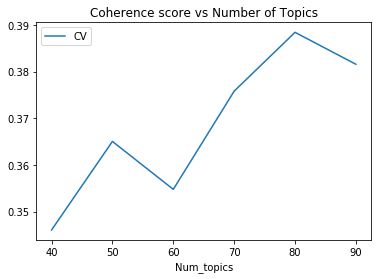

In [ ]:
cv_n_topics.plot.line('Num_topics', 'CV')
plt.title('Coherence score vs Number of Topics')

### Tuning alpha & beta

From the above search, num_of_topics is chosen as 80. The first round is to gauge the rough magnitude of optimal alpha and beta

In [ ]:
from gensim.models import CoherenceModel

# supporting function
def compute_coherence_values_ab(a, b):

    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=80, 
                                       random_state=100,
                                       chunksize=750,
                                       passes=50,
                                       per_word_topics=True,
                                      alpha = a,
                                      eta = b)
        
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np

# Alpha parameter 
alpha = [0.05, 0.3, 0.75]

# Eta parameter
eta = [0.05, 0.3, 0.75]

model_results = {'Alpha': [],
                 'Beta': [],
                 'Coherence': []}


for a in alpha:
    # iterate through eta values
    for b in eta:
        # get the coherence score for the given parameters
        cv = compute_coherence_values_ab(a=a, b=b)
        # Save the model results
        model_results['Alpha'].append(a)
        model_results['Beta'].append(b)
        model_results['Coherence'].append(cv)
        print('Topics: 80' + '   Alpha: ' + str(a) + '   Eta: ' + str(b) + '   CV: ' + str(cv))
                    

Topics: 80   Alpha: 0.05   Eta: 0.05   CV: 0.4337976714564715
Topics: 80   Alpha: 0.05   Eta: 0.3   CV: 0.5826162613805922
Topics: 80   Alpha: 0.05   Eta: 0.75   CV: 0.46555686724409606
Topics: 80   Alpha: 0.3   Eta: 0.05   CV: 0.4423055837397863
Topics: 80   Alpha: 0.3   Eta: 0.3   CV: 0.5143388060521563
Topics: 80   Alpha: 0.3   Eta: 0.75   CV: 0.5489349489798463
Topics: 80   Alpha: 0.75   Eta: 0.05   CV: 0.4587331059719104
Topics: 80   Alpha: 0.75   Eta: 0.3   CV: 0.4535363176046969
Topics: 80   Alpha: 0.75   Eta: 0.75   CV: 0.24888213974447737


In [ ]:
pd.DataFrame(model_results).to_csv('gdrive/My Drive/lda_tuning_results.csv', index=False)


Following the above tuning, we note that the highest Coherence score is gotten when alpha = 0.05 and beta = 0.3. Hence, we will do another round of search in the region of these values to determine more ideal values for alpha and beta

In [ ]:
import numpy as np

# Alpha parameter 
alpha = [0.03, 0.05, 0.1]

# Eta parameter
eta = [0.25, 0.3, 0.4]

model_results = {'Alpha': [],
                 'Beta': [],
                 'Coherence': []}


for a in alpha:
    # iterate through eta values
    for b in eta:
        # get the coherence score for the given parameters
        cv = compute_coherence_values_ab(a=a, b=b)
        # Save the model results
        model_results['Alpha'].append(a)
        model_results['Beta'].append(b)
        model_results['Coherence'].append(cv)
        print('Topics: 80' + '   Alpha: ' + str(a) + '   Eta: ' + str(b) + '   CV: ' + str(cv))
                    

Topics: 80   Alpha: 0.03   Eta: 0.25   CV: 0.571970574586531
Topics: 80   Alpha: 0.03   Eta: 0.3   CV: 0.5884656595218715
Topics: 80   Alpha: 0.03   Eta: 0.4   CV: 0.6080161985447845
Topics: 80   Alpha: 0.05   Eta: 0.25   CV: 0.5576529740900213
Topics: 80   Alpha: 0.05   Eta: 0.3   CV: 0.590862230516857
Topics: 80   Alpha: 0.05   Eta: 0.4   CV: 0.60931704831026
Topics: 80   Alpha: 0.1   Eta: 0.25   CV: 0.5514935672487692
Topics: 80   Alpha: 0.1   Eta: 0.3   CV: 0.5852953692056218
Topics: 80   Alpha: 0.1   Eta: 0.4   CV: 0.6019805953917423


In [ ]:
import numpy as np

# Eta parameter
eta = [0.5, 0.55, 0.6, 0.65]

for b in eta:
    # get the coherence score for the given parameters
    cv_05 = compute_coherence_values_ab(a=0.05, b=b)
    # Save the model results
    model_results['Alpha'].append(0.05)
    model_results['Beta'].append(b)
    model_results['Coherence'].append(cv_05)
    print('Topics: 80' + '   Alpha: ' + str(0.05) + '   Eta: ' + str(b) + '   CV: ' + str(cv_05))
                    

Topics: 80   Alpha: 0.05   Eta: 0.5   CV: 0.6199203194707659
Topics: 80   Alpha: 0.05   Eta: 0.55   CV: 0.6177383547718316
Topics: 80   Alpha: 0.05   Eta: 0.6   CV: 0.594023974653053
Topics: 80   Alpha: 0.05   Eta: 0.65   CV: 0.5485618048836736


In [ ]:
pd.DataFrame(model_results).to_csv('gdrive/My Drive/lda_tuning_results2.csv', index=False)


## Build Final Model
With the parameters obtained above, build LDA model (num_of_topics = 80, alpha = 0.05, eta = 0.55)

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=80, 
                                       random_state=100,
                                       chunksize=750,
                                       passes=50,
                                       per_word_topics=True,
                                      alpha =0.05,
                                      eta = 0.55)


In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
final_cv = coherence_model_lda.get_coherence()
print(final_cv)


0.6187897615330558


In [ ]:
from operator import itemgetter

train_vecs = []

for i in range(len(df)):
    topic_prob = (lda_model.get_document_topics(corpus[i], minimum_probability=0.0)) #Get probabilities of each topic
    top_topic = max(topic_prob,key=itemgetter(1))[0] #get topic with max probability
    train_vecs.append(top_topic)


# Append Topic_No to original dataset
df['Topic_No'] = train_vecs
df['Topic_No'] = df['Topic_No'].apply(lambda x: 'topic_' + str(x))
df.head()

,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,Cast_zoesaldana,Cast_sallyfield,Cast_imogenpoots,Cast_sunildutt,Cast_jasonisaacs,Cast_michaelyork,Cast_harrydeanstanton,Cast_michaelpeã±a,Cast_margotkidder,Topic_No
0,Couple in a Hole,"Devastated by the death of their only son, a m...",2015,NaN,0,105.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,topic_41
1,You're Telling Me!,"A hard-drinking, socially-awkward inventor wre...",1934,NaN,0,66.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,topic_41
2,The Giant Spider Invasion,Giant spiders from another dimension invade Wi...,1975,NaN,0,84.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,topic_5
3,The Christmas Tango,"At the time of the Greek junta, in an isolated...",2011,NaN,0,102.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,topic_65
4,The All-American Boy,"Episodic story in six acts (""The Manly Art in ...",1973,NaN,0,118.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,topic_52


In [ ]:
df['Topic_No'].unique()

array(['topic_41', 'topic_5', 'topic_65', 'topic_52', 'topic_16',
       'topic_72', 'topic_71', 'topic_11', 'topic_43', 'topic_57',
       'topic_20', 'topic_19', 'topic_28', 'topic_22', 'topic_31',
       'topic_9', 'topic_2', 'topic_1', 'topic_56', 'topic_77',
       'topic_68', 'topic_36', 'topic_50', 'topic_75', 'topic_61',
       'topic_30', 'topic_74', 'topic_40', 'topic_62', 'topic_8',
       'topic_37', 'topic_35', 'topic_67', 'topic_38', 'topic_4',
       'topic_24', 'topic_70', 'topic_34', 'topic_0', 'topic_48',
       'topic_63', 'topic_18', 'topic_46', 'topic_53', 'topic_49',
       'topic_55', 'topic_3', 'topic_47', 'topic_64', 'topic_66',
       'topic_59', 'topic_39', 'topic_78', 'topic_29', 'topic_32',
       'topic_58', 'topic_54', 'topic_26', 'topic_42', 'topic_21',
       'topic_6', 'topic_13', 'topic_69', 'topic_79', 'topic_33',
       'topic_14', 'topic_17', 'topic_73', 'topic_60', 'topic_25',
       'topic_12', 'topic_45', 'topic_15', 'topic_51', 'topic_76',
    

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# One-hot
enc = OneHotEncoder(categories='auto')
features_topic = enc.fit_transform(df[['Topic_No']])
features_topic

<58181x80 sparse matrix of type '<class 'numpy.float64'>'
	with 58181 stored elements in Compressed Sparse Row format>

In [ ]:
enc.get_feature_names()

array(['x0_topic_0', 'x0_topic_1', 'x0_topic_10', 'x0_topic_11',
       'x0_topic_12', 'x0_topic_13', 'x0_topic_14', 'x0_topic_15',
       'x0_topic_16', 'x0_topic_17', 'x0_topic_18', 'x0_topic_19',
       'x0_topic_2', 'x0_topic_20', 'x0_topic_21', 'x0_topic_22',
       'x0_topic_23', 'x0_topic_24', 'x0_topic_25', 'x0_topic_26',
       'x0_topic_27', 'x0_topic_28', 'x0_topic_29', 'x0_topic_3',
       'x0_topic_30', 'x0_topic_31', 'x0_topic_32', 'x0_topic_33',
       'x0_topic_34', 'x0_topic_35', 'x0_topic_36', 'x0_topic_37',
       'x0_topic_38', 'x0_topic_39', 'x0_topic_4', 'x0_topic_40',
       'x0_topic_41', 'x0_topic_42', 'x0_topic_43', 'x0_topic_44',
       'x0_topic_45', 'x0_topic_46', 'x0_topic_47', 'x0_topic_48',
       'x0_topic_49', 'x0_topic_5', 'x0_topic_50', 'x0_topic_51',
       'x0_topic_52', 'x0_topic_53', 'x0_topic_54', 'x0_topic_55',
       'x0_topic_56', 'x0_topic_57', 'x0_topic_58', 'x0_topic_59',
       'x0_topic_6', 'x0_topic_60', 'x0_topic_61', 'x0_topic_62',
  

In [ ]:
column_name = enc.get_feature_names()
one_hot = pd.DataFrame(features_topic.todense(), columns = column_name)
one_hot

,x0_topic_0,x0_topic_1,x0_topic_10,x0_topic_11,x0_topic_12,x0_topic_13,x0_topic_14,x0_topic_15,x0_topic_16,x0_topic_17,...,x0_topic_72,x0_topic_73,x0_topic_74,x0_topic_75,x0_topic_76,x0_topic_77,x0_topic_78,x0_topic_79,x0_topic_8,x0_topic_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.join(one_hot)
df

,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,x0_topic_72,x0_topic_73,x0_topic_74,x0_topic_75,x0_topic_76,x0_topic_77,x0_topic_78,x0_topic_79,x0_topic_8,x0_topic_9
0,Couple in a Hole,"Devastated by the death of their only son, a m...",2015,NaN,0,105.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,You're Telling Me!,"A hard-drinking, socially-awkward inventor wre...",1934,NaN,0,66.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Giant Spider Invasion,Giant spiders from another dimension invade Wi...,1975,NaN,0,84.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Christmas Tango,"At the time of the Greek junta, in an isolated...",2011,NaN,0,102.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The All-American Boy,"Episodic story in six acts (""The Manly Art in ...",1973,NaN,0,118.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,The Endless River,Gilles and Tiny are both mourning recent death...,2015,NaN,0,108.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58177,Yesterday Once More,Romance blossoms again for a divorced jewel-th...,2004,NaN,0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58178,Runner,After her boyfriend has a psychotic episode an...,2021,NaN,1,87.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58179,Don't Panic Chaps,Charming farce about British and German soldie...,1959,NaN,0,85.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.drop(['description','Topic_No'],axis = 1)
df

,title,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,Biography,...,x0_topic_72,x0_topic_73,x0_topic_74,x0_topic_75,x0_topic_76,x0_topic_77,x0_topic_78,x0_topic_79,x0_topic_8,x0_topic_9
0,Couple in a Hole,2015,NaN,0,105.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,You're Telling Me!,1934,NaN,0,66.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Giant Spider Invasion,1975,NaN,0,84.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Christmas Tango,2011,NaN,0,102.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The All-American Boy,1973,NaN,0,118.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,The Endless River,2015,NaN,0,108.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58177,Yesterday Once More,2004,NaN,0,99.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58178,Runner,2021,NaN,1,87.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58179,Don't Panic Chaps,1959,NaN,0,85.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.to_csv('/content/drive/My Drive/BT4222 group project/final_data/X_train_topics.csv')

## Testing dataset

In [ ]:
test_full = pd.read_csv('/content/drive/My Drive/BT4222 group project/final_data/x_test.csv')

In [ ]:
test =test_full[['title', 'description']]
test = test[test['description'].notna()] #drop titles without any description
test = test.reset_index(drop = True)
test.head()

,title,description
0,The Lost Tree,"After a serious traumatic accident, a man leav..."
1,Another Day of Life,A gripping story of a three-month-long journey...
2,Two Years Before the Mast,The playboy son of a wealthy shipping magnate ...
3,The Resurrection of Gavin Stone,"A washed-up former child star, forced to do co..."
4,Tales from the Golden Age,Several urban legends of Communist Romania are...


In [ ]:
# Remove punctuation
test['desc_processed'] = test['description'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
# Convert the titles to lowercase
test['desc_processed'] = test['desc_processed'].map(lambda x: x.lower())

In [ ]:
test_data = test.desc_processed.values.tolist()
test_data_words = list(sent_to_words(test_data))


In [ ]:
import spacy
# Remove Stop Words
test_data_nostops = remove_stopwords(test_data_words)
print('Stopword removal done')

# Form Bigrams
test_data_bigrams = make_bigrams(test_data_nostops)
print('Bigram')

# Do lemmatization
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
test_data_lemmatized = lemmatization(test_data_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print('Lemmatised')

Stopword removal done
Bigram
Lemmatised


In [ ]:
import gensim.corpora as corpora
# Term Document Frequaency
test_corpus = [id2word.doc2bow(text) for text in test_data_lemmatized]

In [ ]:
from operator import itemgetter

test_vec = []

for i in range(len(test_full)):
    test_topic_prob = (lda_model.get_document_topics(test_corpus[i], minimum_probability=0.0)) #Get probabilities of each topic
    test_top_topic = max(test_topic_prob,key=itemgetter(1))[0] #get topic with max probability
    test_vec.append(test_top_topic)


# Append Topic_No to original dataset
test_full['Topic_No'] = test_vec
test_full['Topic_No'] = test_full['Topic_No'].apply(lambda x: 'topic_' + str(x))


In [ ]:
features_topic_test = enc.transform(test_full[['Topic_No']])


In [ ]:
column_name = enc.get_feature_names()
one_hot_test = pd.DataFrame(features_topic_test.todense(), columns = column_name)
one_hot_test

,x0_topic_0,x0_topic_1,x0_topic_10,x0_topic_11,x0_topic_12,x0_topic_13,x0_topic_14,x0_topic_15,x0_topic_16,x0_topic_17,...,x0_topic_72,x0_topic_73,x0_topic_74,x0_topic_75,x0_topic_76,x0_topic_77,x0_topic_78,x0_topic_79,x0_topic_8,x0_topic_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_full = test_full.join(one_hot_test)
test_full

,title,description,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,...,x0_topic_72,x0_topic_73,x0_topic_74,x0_topic_75,x0_topic_76,x0_topic_77,x0_topic_78,x0_topic_79,x0_topic_8,x0_topic_9
0,The Lost Tree,"After a serious traumatic accident, a man leav...",2016,NaN,0,88.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Another Day of Life,A gripping story of a three-month-long journey...,2018,NaN,0,85.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Two Years Before the Mast,The playboy son of a wealthy shipping magnate ...,1946,NaN,0,98.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Resurrection of Gavin Stone,"A washed-up former child star, forced to do co...",2017,NaN,0,91.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tales from the Golden Age,Several urban legends of Communist Romania are...,2009,NaN,0,155.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,The Structure of Crystal,Jan and Marek used to study physics together b...,1969,NaN,0,74.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14542,Run of the House,This show centers around two brothers and two ...,2003,2004,1,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14543,The Wiggles,Get ready to Wiggle with the Wiggles' TV serie...,1998,,1,30.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14544,White House Madness,Nixon finds his administration crumbling aroun...,1975,NaN,0,79.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_full = test_full.drop(['description','Topic_No'],axis = 1)
test_full

,title,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,Biography,...,x0_topic_72,x0_topic_73,x0_topic_74,x0_topic_75,x0_topic_76,x0_topic_77,x0_topic_78,x0_topic_79,x0_topic_8,x0_topic_9
0,The Lost Tree,2016,NaN,0,88.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Another Day of Life,2018,NaN,0,85.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Two Years Before the Mast,1946,NaN,0,98.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Resurrection of Gavin Stone,2017,NaN,0,91.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tales from the Golden Age,2009,NaN,0,155.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,The Structure of Crystal,1969,NaN,0,74.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14542,Run of the House,2003,2004,1,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14543,The Wiggles,1998,,1,30.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14544,White House Madness,1975,NaN,0,79.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_full.to_csv('/content/drive/My Drive/BT4222 group project/final_data/X_test_topics.csv'